<a href="https://colab.research.google.com/github/srinath9121/CapStone-project/blob/main/Final_airplane_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder


IMPORTING MODELS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
import xgboost as XGBClassifier
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

IMPORT ANN MODEL LIBRARY

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
file_path = "Airplane.csv"
df = pd.read_csv('/content/Airplane.csv')


df_head = df.head()

df_head

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df.shape

(103904, 25)

#  Step 1 :Data Pre-Processing(Cleaning)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [ ]:
df.shape

(103904, 23)

In [ ]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)


In [ ]:
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [ ]:
for col in df:
  print(f" {col} = {df[col].unique()}")

 Gender = ['Male' 'Female']
 Customer Type = ['Loyal Customer' 'disloyal Customer']
 Age = [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
 Type of Travel = ['Personal Travel' 'Business travel']
 Class = ['Eco Plus' 'Business' 'Eco']
 Flight Distance = [ 460  235 1142 ...  974 1479  400]
 Inflight wifi service = [3 2 4 1 5 0]
 Departure/Arrival time convenient = [4 2 5 3 1 0]
 Ease of Online booking = [3 2 5 4 1 0]
 Gate location = [1 3 2 5 4 0]
 Food and drink = [5 1 2 4 3 0]
 Online boarding = [3 5 2 1 4 0]
 Seat comfort = [5 1 2 3 4 0]
 Inflight entertainment = [5 1 2 3 4 0]
 On-board service = [4 1 2 3 5 0]
 Leg room service = [3 5 4 2 1 0]
 Baggage handling = [4 3 5 1 2]
 Checkin service = [4 1 3 5 2 0]
 Inflight service = [5 4 3 1 2 0]
 Cleanliness = [5 1 2 3 4 0]
 Departure Delay in Minutes = [  25  

In [ ]:
le = LabelEncoder()
for col in ['Gender', 'Customer Type', 'Type of Travel']:
    df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:


data_dummies = pd.get_dummies(df['Class'], prefix='Class')

In [ ]:
data_dummies=data_dummies.astype(int)
data_dummies

,Class_Business,Class_Eco,Class_Eco Plus
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
103899,0,1,0
103900,1,0,0
103901,1,0,0
103902,0,1,0


In [ ]:
df.drop(columns=['Class'], inplace=True)

In [ ]:
df= pd.concat([df, data_dummies], axis=1)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Flight Distance                    103904 non-null  int64  
 5   Inflight wifi service              103904 non-null  int64  
 6   Departure/Arrival time convenient  103904 non-null  int64  
 7   Ease of Online booking             103904 non-null  int64  
 8   Gate location                      103904 non-null  int64  
 9   Food and drink                     103904 non-null  int64  
 10  Online boarding                    103904 non-null  int64  
 11  Seat comfort                       1039

In [ ]:
df['satisfaction'] = df['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Flight Distance                    103904 non-null  int64  
 5   Inflight wifi service              103904 non-null  int64  
 6   Departure/Arrival time convenient  103904 non-null  int64  
 7   Ease of Online booking             103904 non-null  int64  
 8   Gate location                      103904 non-null  int64  
 9   Food and drink                     103904 non-null  int64  
 10  Online boarding                    103904 non-null  int64  
 11  Seat comfort                       1039

In [ ]:
data_numeric = df.drop(columns=['satisfaction'])
corr_matrix = data_numeric.corr()
df.corr()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
Gender,1.000000,-0.031732,0.008928,0.006909,0.005828,0.008974,0.009142,0.006951,0.000333,0.005772,...,0.037391,0.010563,0.039410,0.006505,0.002935,0.000347,0.012211,0.010634,-0.005295,-0.010351
Customer Type,-0.031732,1.000000,-0.281674,-0.308333,-0.225200,-0.007543,-0.206869,-0.019509,0.006078,-0.059454,...,0.024723,-0.032177,0.022670,-0.083613,0.004036,0.004815,-0.187638,-0.085601,0.118694,-0.062967
Age,0.008928,-0.281674,1.000000,-0.048524,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,...,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012105,0.137167,0.138939,-0.132551,-0.013376
Type of Travel,0.006909,-0.308333,-0.048524,1.000000,-0.267344,-0.105085,0.259763,-0.133511,-0.030700,-0.063439,...,-0.031321,0.016751,-0.022599,-0.079207,-0.005432,-0.005867,-0.449000,-0.552125,0.500938,0.102775
Flight Distance,0.005828,-0.225200,0.099461,-0.267344,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,...,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002470,0.298780,0.466896,-0.404493,-0.123674
Inflight wifi service,0.008974,-0.007543,0.017859,-0.105085,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,...,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019042,0.284245,0.032885,-0.037197,0.008034
Departure/Arrival time convenient,0.009142,-0.206869,0.038125,0.259763,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,...,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000918,-0.051601,-0.096870,0.082321,0.028740
Ease of Online booking,0.006951,-0.019509,0.024842,-0.133511,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,...,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007947,0.171705,0.107436,-0.098039,-0.018914
Gate location,0.000333,0.006078,-0.001330,-0.030700,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,...,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005178,0.000682,0.004526,-0.003488,-0.002031
Food and drink,0.005772,-0.059454,0.023000,-0.063439,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,...,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032466,0.209936,0.087114,-0.078801,-0.016671


In [ ]:
# Basic information
print("Shape:", df.shape)
print("Columns:", df.columns)
print("Summary statistics:")
print(df.describe())

Shape: (103904, 25)
Columns: Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')
Summary statistics:
              Gender  Customer Type            Age  Type of Travel  \
count  103904.000000  103904.000000  103904.000000   103904.000000   
mean        0.492541       0.182678      39.379706        0.310373   
std         0.499947       0.386404      15.114964        0.462649   
min         0.000000       0.000000       7.000000        0.000000   
25%         0.000000       0.0

In [ ]:
# before
z_scores = df.select_dtypes(include='number').apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print(outliers[outliers > 0])  # Columns with outliers


Age                             17
Flight Distance                 58
Inflight service                 3
Departure Delay in Minutes    2222
Arrival Delay in Minutes      2225
Class_Eco Plus                7494
dtype: int64


In [ ]:

for col in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    df[col] = np.log1p(df[col])


In [ ]:

print(df['Class_Eco Plus'].unique())
print(df['Class_Eco'].unique())
df['Arrival Delay in Minutes'] = np.rint(df['Arrival Delay in Minutes']).astype(int)
df['Departure Delay in Minutes'] = np.rint(df['Departure Delay in Minutes']).astype(int)
print(df['Arrival Delay in Minutes'].unique())
print(df['Departure Delay in Minutes'].unique())

[1 0]
[0 1]
[3 2 0 4 5 1 6 7]
[3 1 0 2 4 5 6 7]


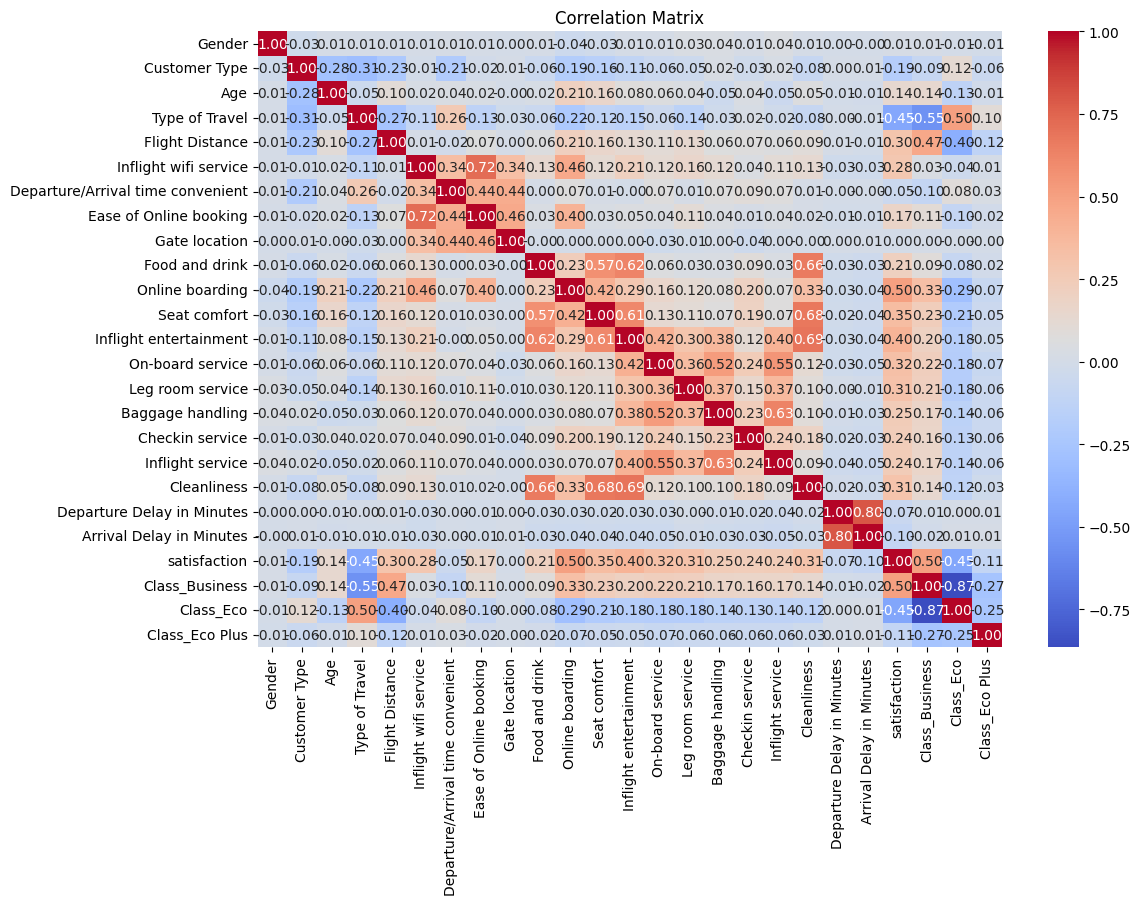

In [ ]:


# Assuming df is your DataFrame with numerical features
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


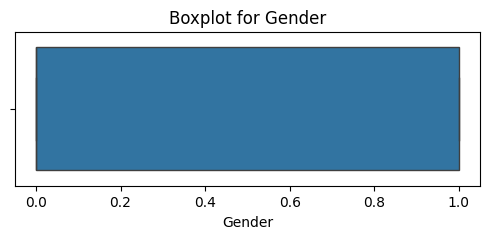

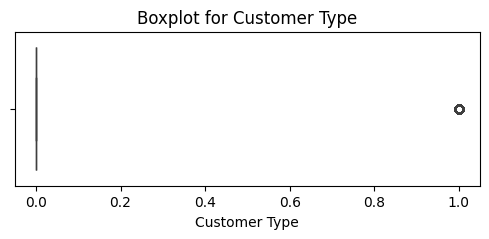

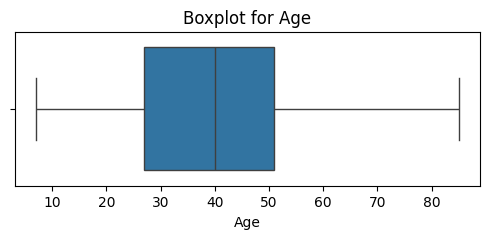

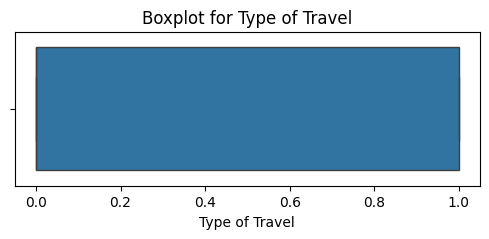

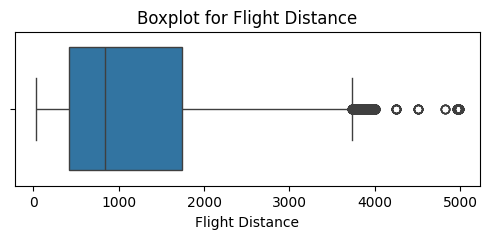

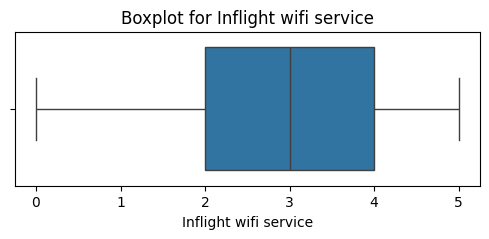

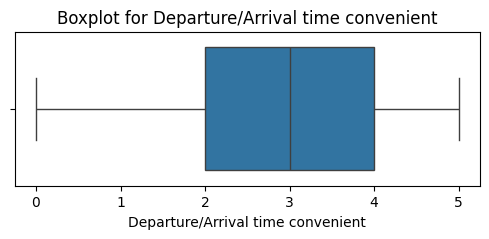

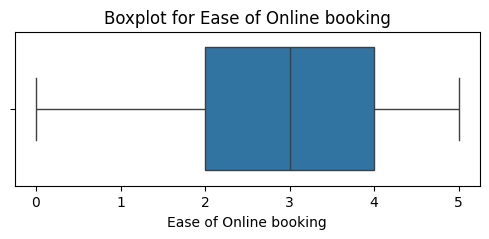

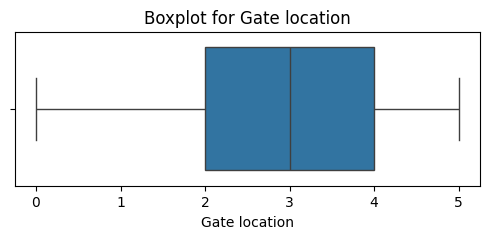

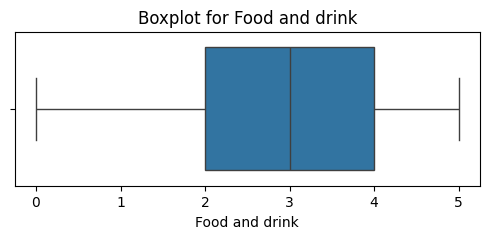

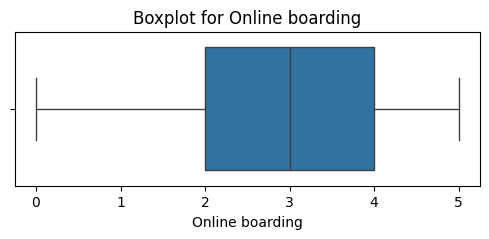

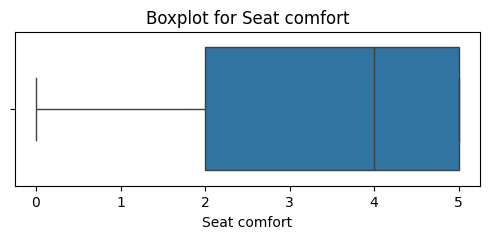

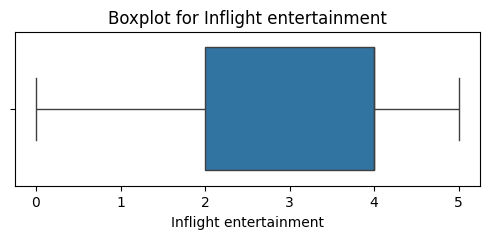

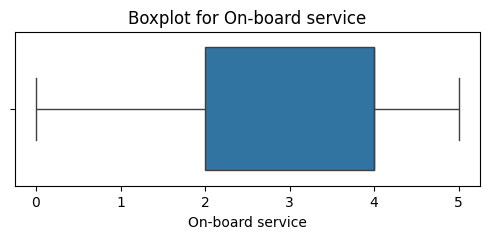

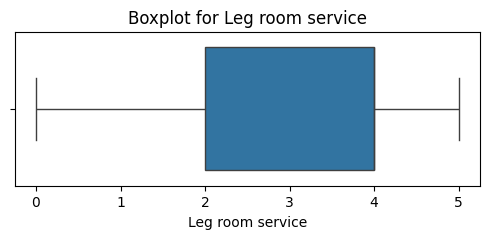

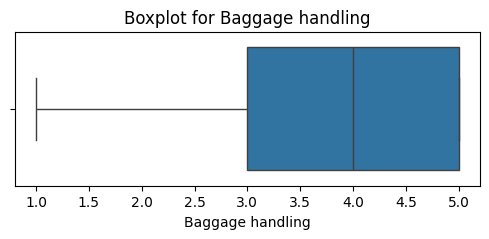

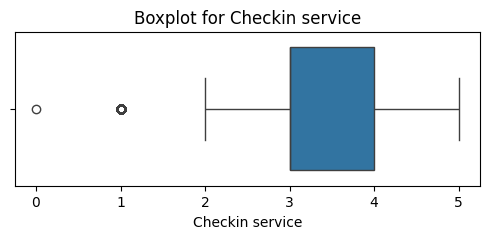

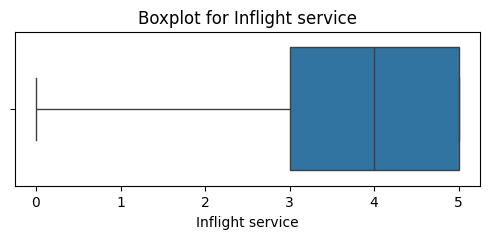

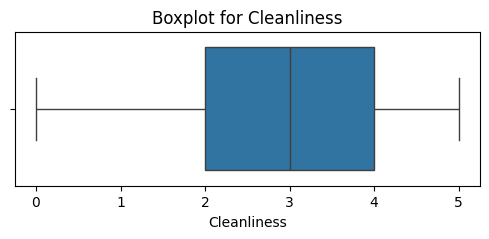

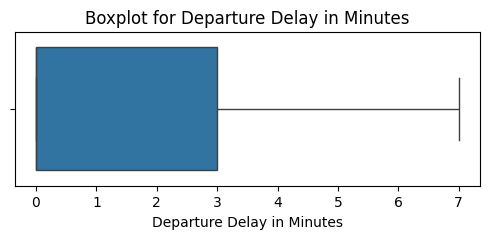

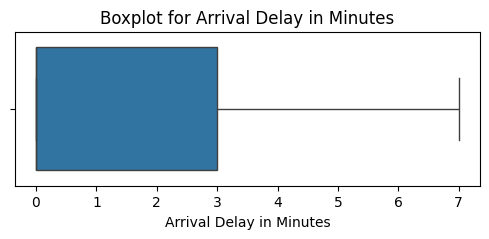

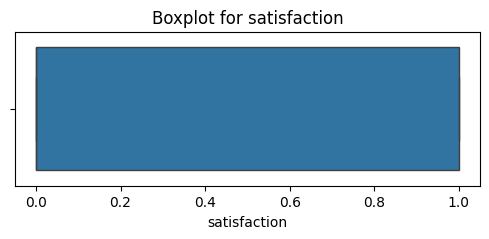

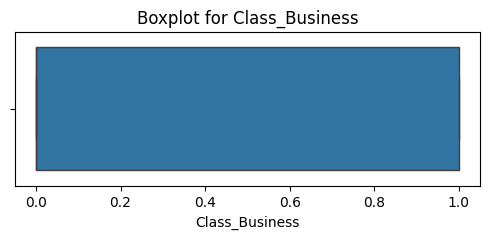

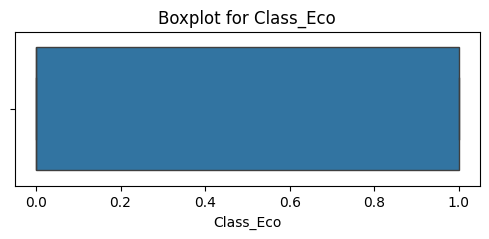

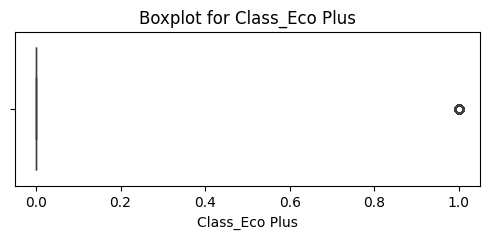

In [ ]:

for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [ ]:
print(df['Age'].unique())


[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]


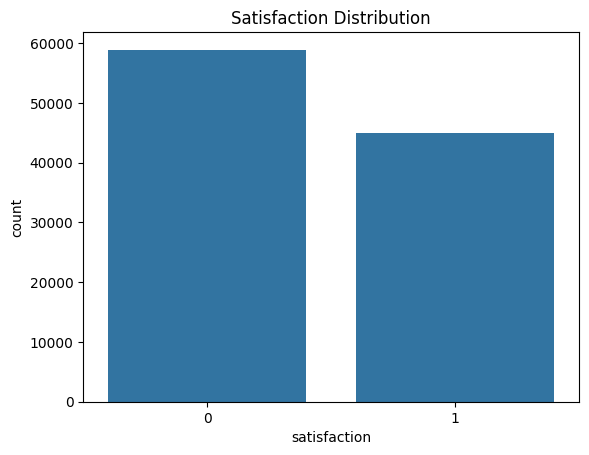

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Satisfaction distribution
sns.countplot(data=df, x='satisfaction')
plt.title("Satisfaction Distribution")
plt.show()



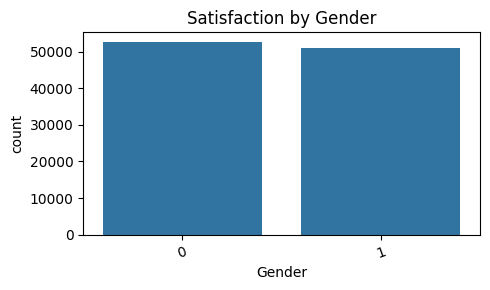

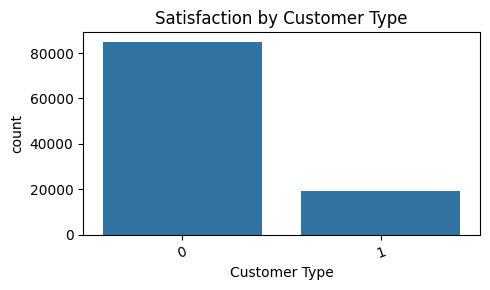

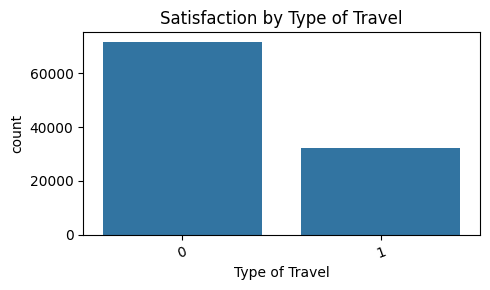

In [ ]:
top_cats = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for c in top_cats:
    if c in df.columns:
        plt.figure(figsize=(5,3))
        order_vals = df[c].value_counts().index
        sns.countplot(data=df, x=c, order=order_vals)
        plt.title('Satisfaction by ' + c)
        plt.xticks(rotation=20)
        plt.tight_layout()
        plt.show()


# **Step 2: Exploratory Data Analysis (Visualization)**


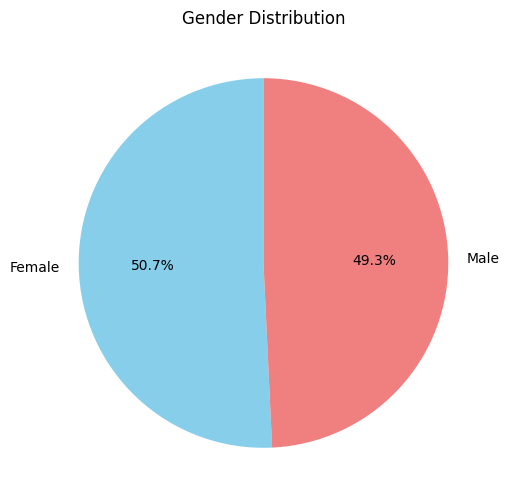

Value counts for 'Gender':
Gender
0    52727
1    51177
Name: count, dtype: int64


In [ ]:
gender_counts = df['Gender'].value_counts()
gender_labels = ['Female' if label == 0 else 'Male' for label in gender_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()
print("Value counts for 'Gender':")
print(df['Gender'].value_counts())

([<matplotlib.patches.Wedge at 0x7d133d268190>,
 [Text(-0.2287050937018073, 1.0759618859954323, 'Neutral or dissatisfied'),
  Text(0.22870518776538568, -1.0759618660013932, 'Satisfied')],
 [Text(-0.12474823292825851, 0.586888301452054, '56.7%'),
  Text(0.1247482842356649, -0.5868882905462144, '43.3%')])

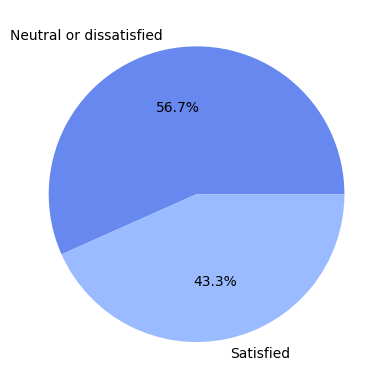

In [ ]:
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("coolwarm"), autopct = '%1.1f%%')

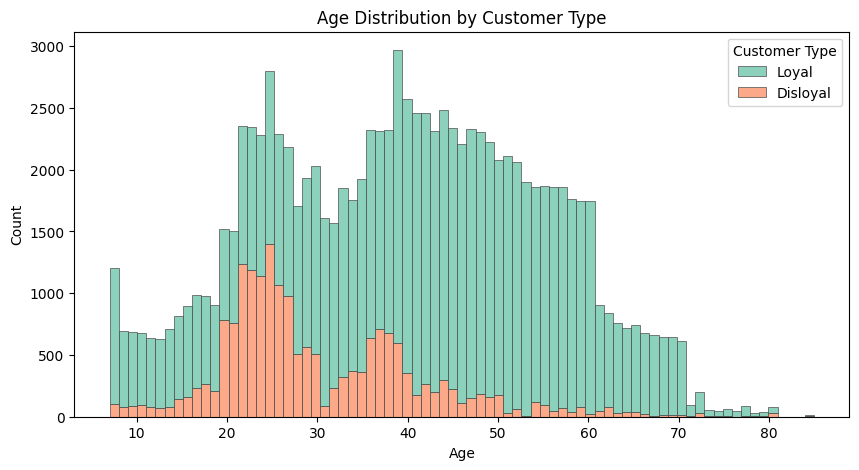

In [ ]:
df_plot = df.copy()
df_plot["Customer Type"] = df_plot["Customer Type"].map({0: "Loyal", 1: "Disloyal"})

plt.figure(figsize=(10,5))

sns.histplot(
    data=df_plot,
    x="Age",
    hue="Customer Type",
    multiple="stack",
    palette="Set2",
    edgecolor=".3",
    linewidth=.5
)

plt.title("Age Distribution by Customer Type")
plt.show()

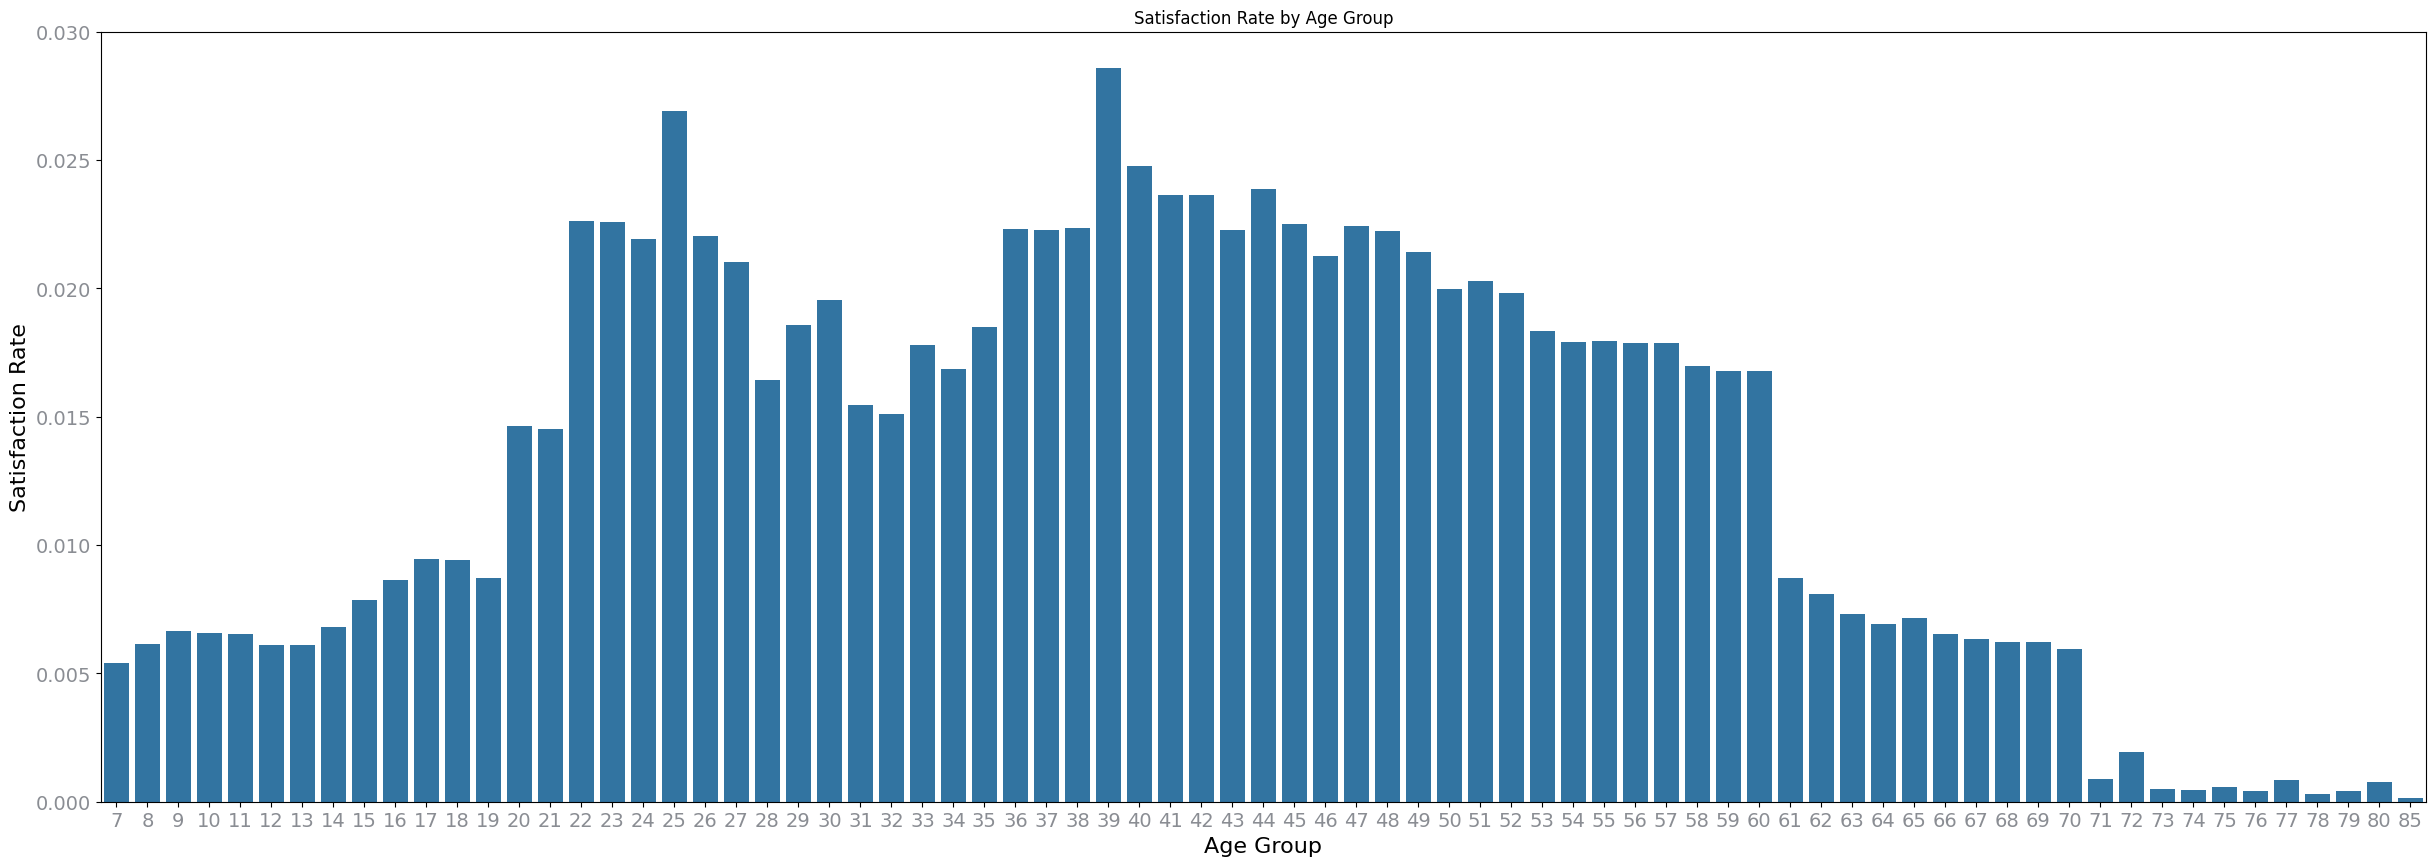

In [ ]:
age_group_satisfaction_rate = df['Age'].value_counts(normalize=True).reset_index()
age_group_satisfaction_rate.columns = ['Age', 'Satisfaction Rate']

plt.figure(figsize=(30, 10))

sns.barplot(data=age_group_satisfaction_rate, x='Age', y='Satisfaction Rate')


plt.title('Satisfaction Rate by Age Group')
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Satisfaction Rate', fontsize=16)
plt.xticks(fontsize=14, color='#8a8d93')
plt.yticks(fontsize=14, color='#8a8d93')

plt.show()

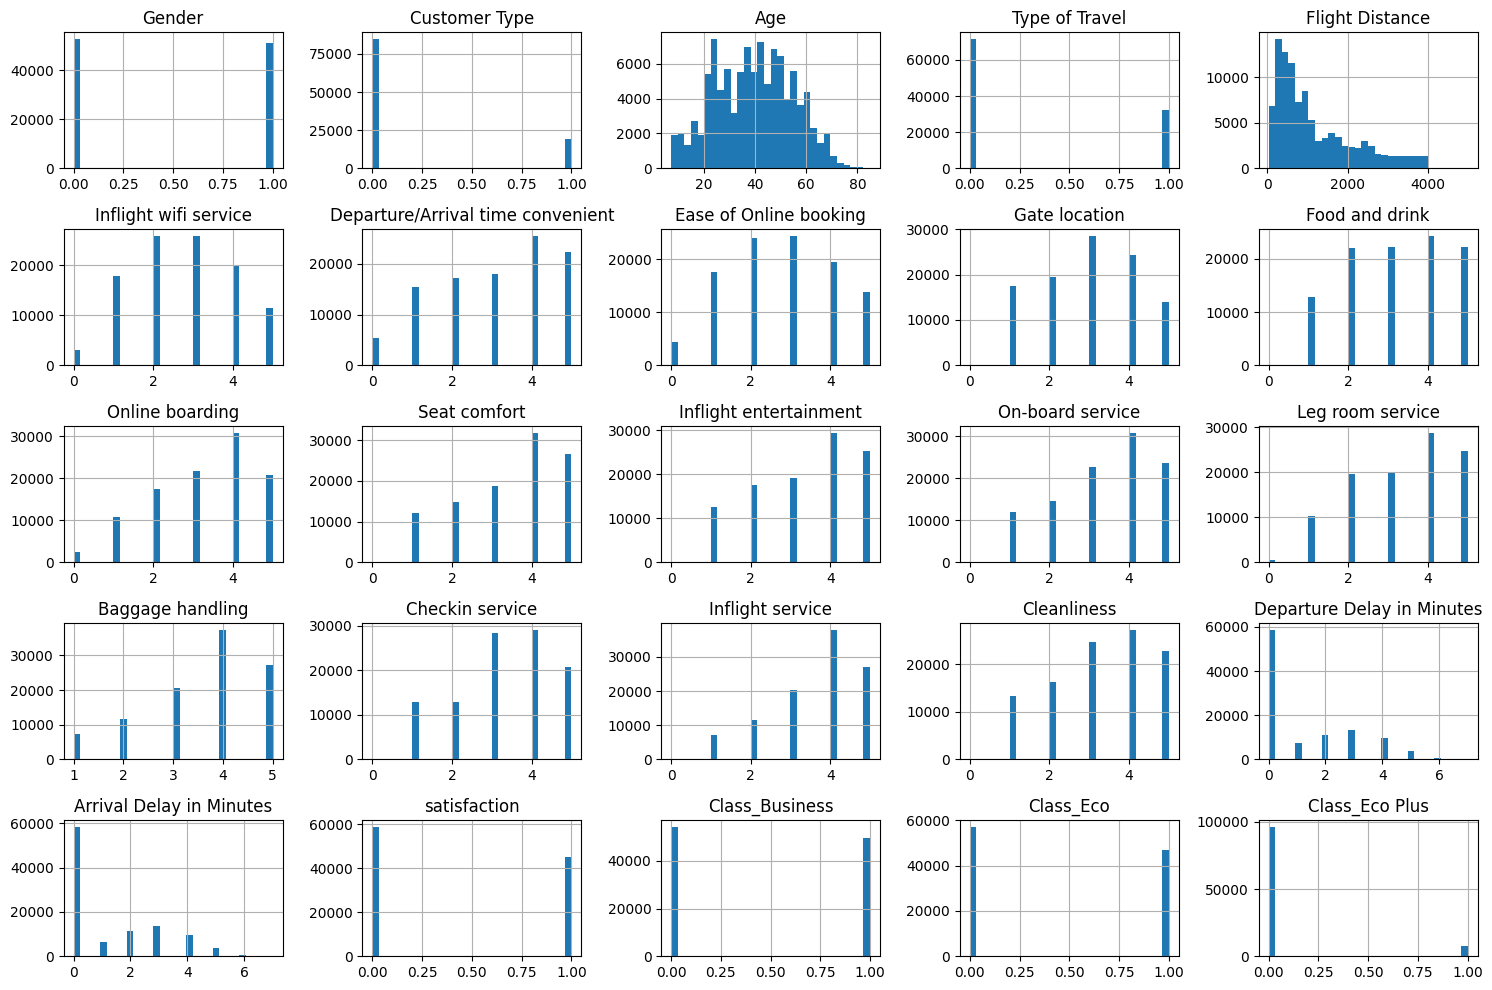

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


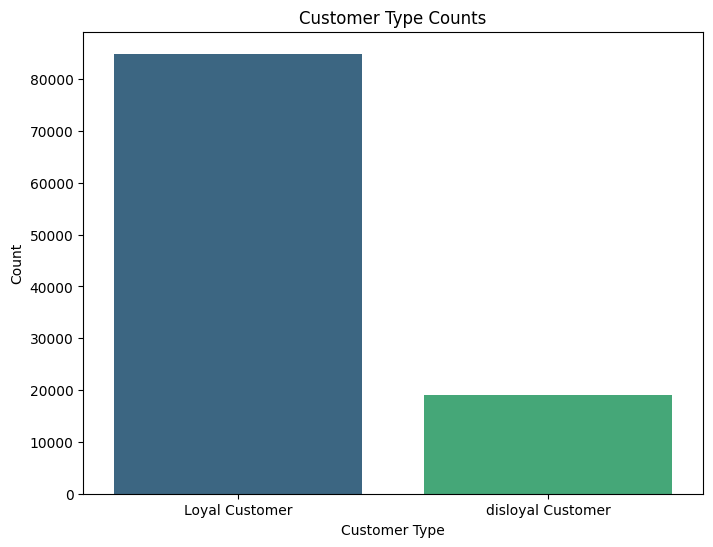


Value counts for 'Customer Type':
Customer Type
0    84923
1    18981
Name: count, dtype: int64


In [ ]:

# Assuming df_cleaned is your DataFrame after preprocessing
customer_type_counts = df['Customer Type'].value_counts().sort_index()
customer_type_labels = ['Loyal Customer' if label == 0 else 'disloyal Customer' for label in customer_type_counts.index]

plt.figure(figsize=(8, 6))
sns.barplot(x=customer_type_counts.index, y=customer_type_counts.values, hue=customer_type_counts.index, palette='viridis', legend=False)
plt.xticks(ticks=customer_type_counts.index, labels=customer_type_labels, rotation=0)
plt.title('Customer Type Counts')
plt.ylabel('Count')
plt.xlabel('Customer Type')
plt.show()
print("\nValue counts for 'Customer Type':")
print(df['Customer Type'].value_counts())

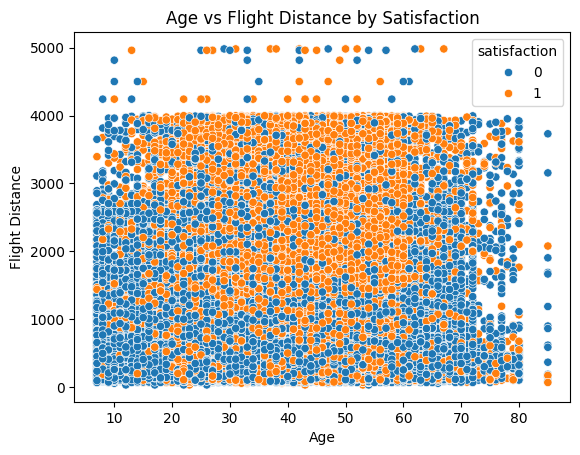

In [ ]:
sns.scatterplot(data=df, x='Age', y='Flight Distance', hue='satisfaction')
plt.title('Age vs Flight Distance by Satisfaction')
plt.show()

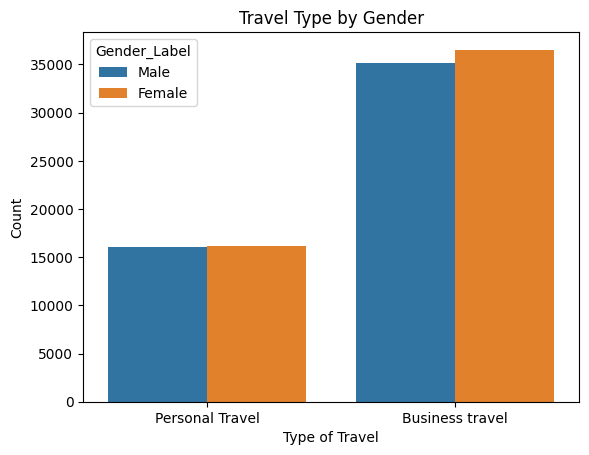

In [ ]:


gender_map = {0: 'Female', 1: 'Male'}
travel_type_map = {0: 'Business travel', 1: 'Personal Travel'}

df_cleaned_plot = df.copy()
df_cleaned_plot['Gender_Label'] = df_cleaned_plot['Gender'].map(gender_map)
df_cleaned_plot['Type of Travel_Label'] = df_cleaned_plot['Type of Travel'].map(travel_type_map)

sns.countplot(data=df_cleaned_plot, x='Type of Travel_Label', hue='Gender_Label')
plt.title('Travel Type by Gender')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.show()

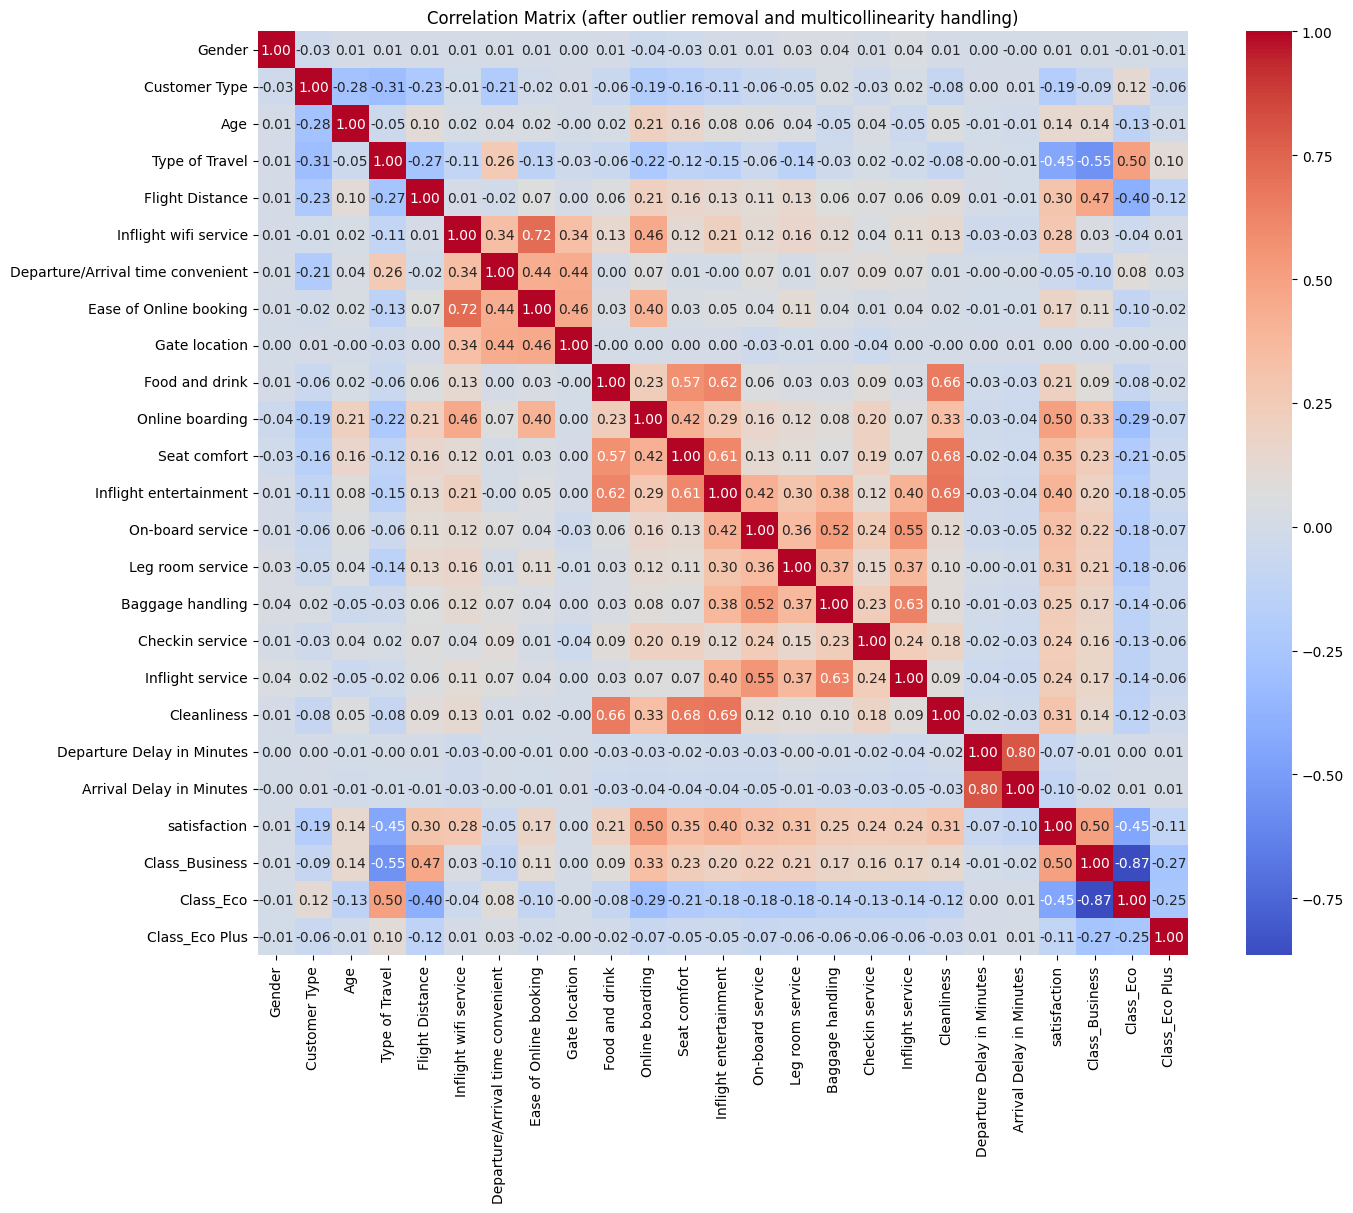

In [ ]:
# Redefine numeric_cols based on the columns in df_cleaned
numeric_cols = df.select_dtypes(include='number').columns

corr = df[numeric_cols].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (after outlier removal and multicollinearity handling)')
plt.show()

In [ ]:
print(df['Customer Type'].value_counts())
print(df['Type of Travel'].value_counts())
print(df['satisfaction'].value_counts())
print(df['Gender'].value_counts())


Customer Type
0    84923
1    18981
Name: count, dtype: int64
Type of Travel
0    71655
1    32249
Name: count, dtype: int64
satisfaction
0    58879
1    45025
Name: count, dtype: int64
Gender
0    52727
1    51177
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Gender                             103904 non-null  int64
 1   Customer Type                      103904 non-null  int64
 2   Age                                103904 non-null  int64
 3   Type of Travel                     103904 non-null  int64
 4   Flight Distance                    103904 non-null  int64
 5   Inflight wifi service              103904 non-null  int64
 6   Departure/Arrival time convenient  103904 non-null  int64
 7   Ease of Online booking             103904 non-null  int64
 8   Gate location                      103904 non-null  int64
 9   Food and drink                     103904 non-null  int64
 10  Online boarding                    103904 non-null  int64
 11  Seat comfort                       103904 non-null  int64
 12  In

# Step 3: Feature Engineering and Selection

In [ ]:


X = df.drop('satisfaction', axis=1)  # features
y = df['satisfaction']               # target


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state = 42)

# Step 4: Model Training & Testing

##Test Train 80 20

1.LOGISTIC REGRESSION


In [ ]:

logreg = LogisticRegression(C=1e9)

logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print(predictions)

[0 0 0 ... 0 1 1]


In [ ]:

z=confusion_matrix(y_test, predictions)
z

array([[9895, 1818],
       [1574, 7494]])

ACCURACY

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8367739762282854

CLASSIFICATION REPORT

In [ ]:

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     11713
           1       0.80      0.83      0.82      9068

    accuracy                           0.84     20781
   macro avg       0.83      0.84      0.83     20781
weighted avg       0.84      0.84      0.84     20781



SVM

In [ ]:
model = SVC(kernel='rbf')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test,y_pred)

0.6680621721765074

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[9802, 1911],
       [4987, 4081]])

In [ ]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

True Negatives (TN): 9802
False Positives (FP): 1911
False Negatives (FN): 4987
True Positives (TP): 4081


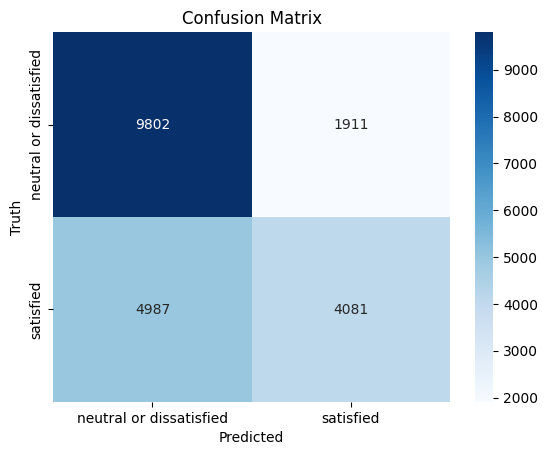

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["neutral or dissatisfied" ,"satisfied"], yticklabels=["neutral or dissatisfied" ,"satisfied"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

2.KNN

---



---



In [ ]:
model=KNeighborsClassifier(n_neighbors=25)

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
knn

,Predicted,Actual
80638,0,0
43398,0,0
32751,0,0
33571,0,0
71287,0,0
...,...,...
8158,0,0
53718,0,0
33319,0,0
99162,1,1


In [ ]:

accuracy_score(y_test,y_pred)

0.7764303931475868

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[9871, 1842],
       [2804, 6264]])

In [ ]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

True Negatives (TN): 9871
False Positives (FP): 1842
False Negatives (FN): 2804
True Positives (TP): 6264


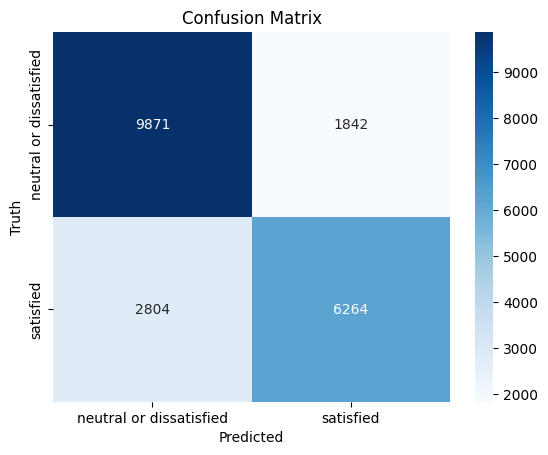

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["neutral or dissatisfied" ,"satisfied"], yticklabels=["neutral or dissatisfied" ,"satisfied"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     11713
           1       0.77      0.69      0.73      9068

    accuracy                           0.78     20781
   macro avg       0.78      0.77      0.77     20781
weighted avg       0.78      0.78      0.77     20781





3.DecisionTreeClassifier**



In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

,Predicted,Actual
80638,0,0
43398,0,0
32751,0,0
33571,0,0
71287,0,0
...,...,...
8158,0,0
53718,0,0
33319,0,0
99162,1,1


In [ ]:
accuracy_score(y_test,y_pred)

0.9500024060439825

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[11193,   520],
       [  519,  8549]])

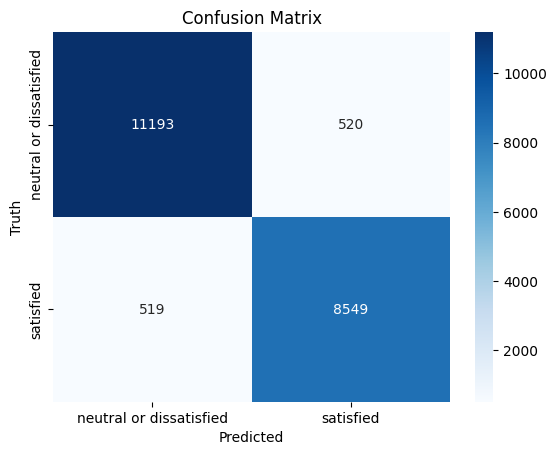

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["neutral or dissatisfied" ,"satisfied"], yticklabels=["neutral or dissatisfied" ,"satisfied"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11713
           1       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



Decision Tree Classifier Parameter

In [ ]:
# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3) # 'gini', 'log_loss', 'entropy'

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8831002181444887

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[15309,  2355],
       [ 1289, 12219]])

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     17664
           1       0.84      0.90      0.87     13508

    accuracy                           0.88     31172
   macro avg       0.88      0.89      0.88     31172
weighted avg       0.89      0.88      0.88     31172



 4.RANDOM FOREST

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9622251094750012

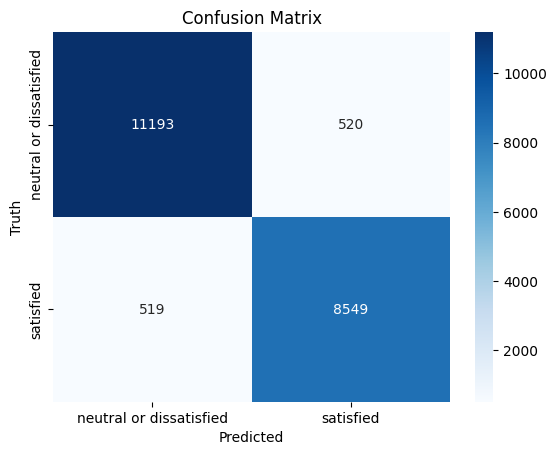

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["neutral or dissatisfied" ,"satisfied"], yticklabels=["neutral or dissatisfied" ,"satisfied"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



Random Forest Classifier Parameter

In [ ]:

clf = RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=10, bootstrap=True) # 'gini', 'log_loss', 'entropy'


clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9415821891441036

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[16887,   777],
       [ 1044, 12464]])

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17664
           1       0.94      0.92      0.93     13508

    accuracy                           0.94     31172
   macro avg       0.94      0.94      0.94     31172
weighted avg       0.94      0.94      0.94     31172



5.Bagging Classifier

In [ ]:
model = BaggingClassifier()

In [ ]:
model.fit(X_train, y_train)

BaggingClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.959241614936721

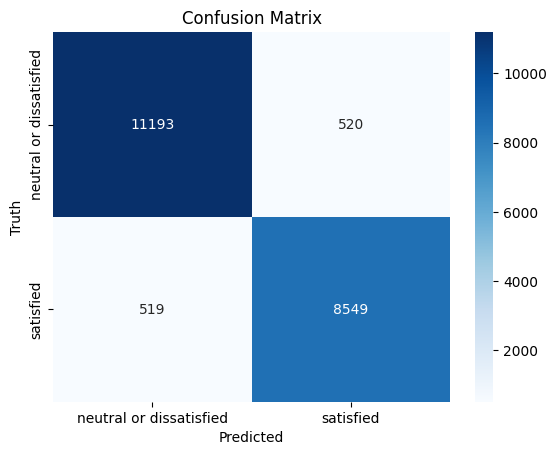

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["neutral or dissatisfied" ,"satisfied"], yticklabels=["neutral or dissatisfied" ,"satisfied"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     11713
           1       0.97      0.94      0.95      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



6.Ada Boosting_Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9099177132957991

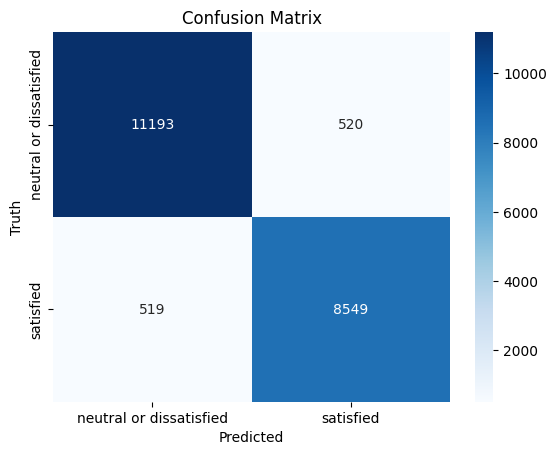

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["neutral or dissatisfied" ,"satisfied"], yticklabels=["neutral or dissatisfied" ,"satisfied"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     11713
           1       0.90      0.89      0.90      9068

    accuracy                           0.91     20781
   macro avg       0.91      0.91      0.91     20781
weighted avg       0.91      0.91      0.91     20781



7.GradientBoost_Classifer

In [ ]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9418218565035369

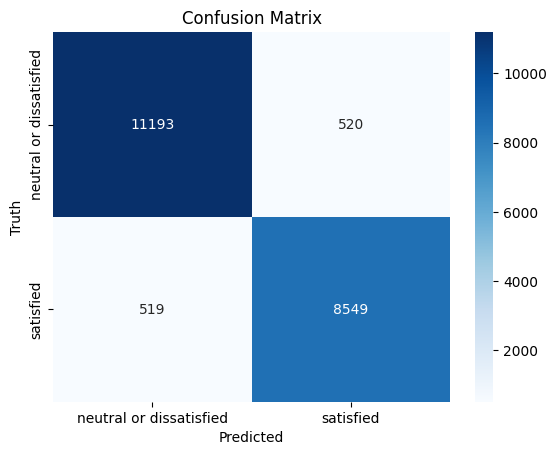

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["neutral or dissatisfied" ,"satisfied"], yticklabels=["neutral or dissatisfied" ,"satisfied"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11713
           1       0.95      0.92      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



7.1 GradientBoosting Classifier Parameter

In [ ]:
br = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, loss='exponential', criterion='squared_error')

br = br.fit(X_train,y_train)
y_pred = br.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9423030653000337

 8.XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9629950435493961

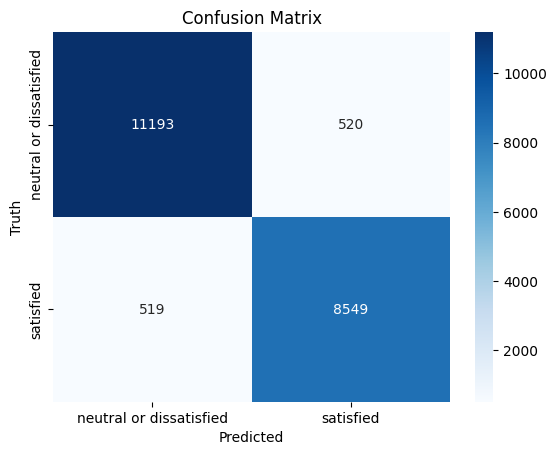

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["neutral or dissatisfied" ,"satisfied"], yticklabels=["neutral or dissatisfied" ,"satisfied"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



8.1 XGBoosting Classifier Parameter

In [ ]:

br = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, n_jobs=-1)
br = br.fit(X_train,y_train)
y_pred = br.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9614551754006063

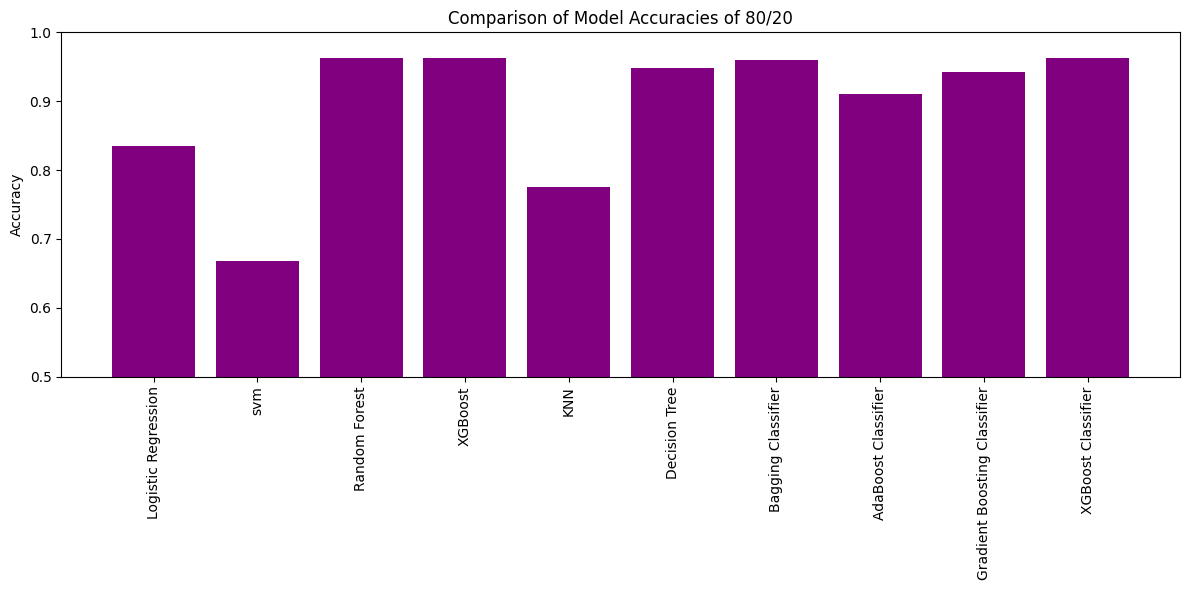

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their accuracies (obtained from previous outputs)
model_names = [
    "Logistic Regression","svm",
    "Random Forest",
    "XGBoost",
    "KNN",
    "Decision Tree",
    "Bagging Classifier",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier",
]

accuracies = [
    0.8346, # Logistic Regression
    0.6680,#svm
    0.9624, # Random Forest
    0.9633, # XGBoost accuracy
    0.7759, # KNN accuracy
    0.9480, # Decision Tree accuracy
    0.9596, # Bagging Classifier accuracy
    0.9099, # AdaBoost Classifier accuracy
    0.9418, # Gradient Boosting Classifier accuracy
    0.9633, # XGBoost Classifier accuracy
]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='purple')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies of 80/20')
plt.xticks(rotation=90)
plt.ylim(0.5, 1.0) # Adjusted ylim based on new accuracies
plt.tight_layout()
plt.show()

##ANN

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

tf.random.set_seed(42)

model_accuracies = {}

# ===============================
# ANN Versions: Different Optimizers + Activations
# ===============================

# 1. ReLU + Adam
model_relu_adam = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_relu_adam.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                 tf.keras.metrics.Precision(name='precision'),
                                 tf.keras.metrics.Recall(name='recall')])

history_relu_adam = model_relu_adam.fit(X_train, y_train,
                                        epochs=125,
                                        validation_data=(X_test, y_test),
                                        verbose=0)

loss_relu_adam, acc_relu_adam, _, _ = model_relu_adam.evaluate(X_test, y_test, verbose=0)
model_accuracies["ANN (ReLU + Adam)"] = acc_relu_adam




==== ANN Results Summary ====

                       MODEL ARCHITECTURE OPTIMIZER  EPOCHS  ACCURACY  \
0          ANN (ReLU + Adam)    24-15-8-1      Adam     125  0.943987   
1  ANN (LeakyReLU + RMSprop)    24-15-7-1   RMSprop     130  0.943795   
2          ANN (ELU + Nadam)    25-12-8-1     Nadam     120  0.946345   
3           ANN (Tanh + SGD)    25-15-8-1       SGD     135  0.563640   

       LOSS  
0  0.136149  
1  0.137068  
2  0.128698  
3  0.685053  


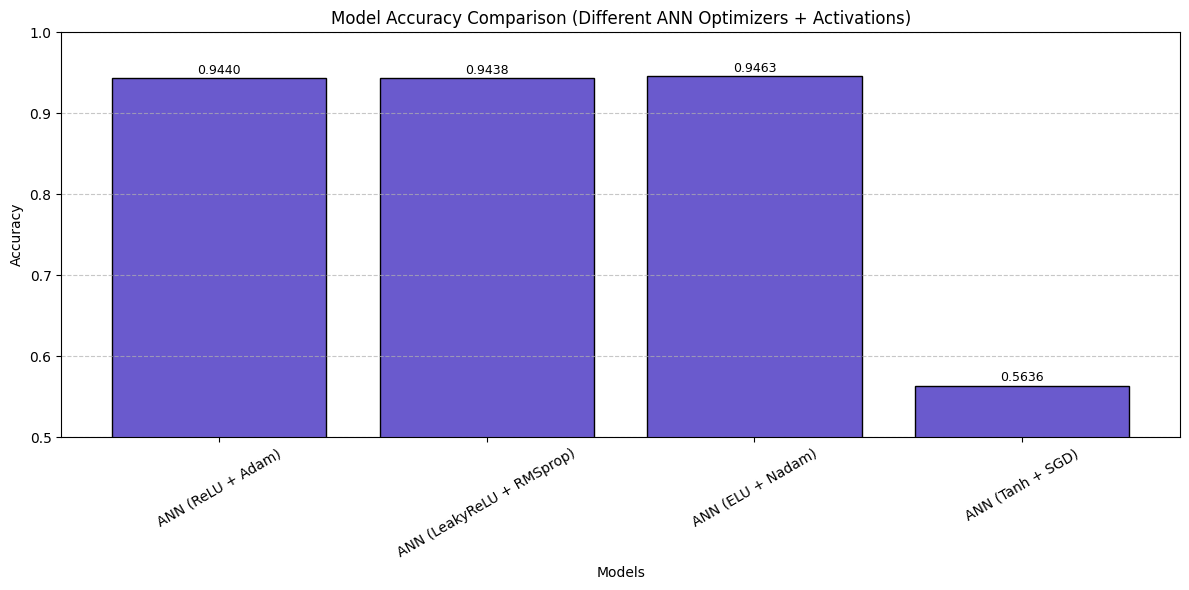

In [ ]:
# 2. LeakyReLU + RMSprop
model_lrelu_rms = tf.keras.Sequential([
    tf.keras.layers.Dense(24),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(15),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(7),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lrelu_rms.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                 tf.keras.metrics.Precision(name='precision'),
                                 tf.keras.metrics.Recall(name='recall')])

history_lrelu_rms = model_lrelu_rms.fit(X_train, y_train,
                                        epochs=130,
                                        validation_data=(X_test, y_test),
                                        verbose=0)

loss_lrelu_rms, acc_lrelu_rms, _, _ = model_lrelu_rms.evaluate(X_test, y_test, verbose=0)
model_accuracies["ANN (LeakyReLU + RMSprop)"] = acc_lrelu_rms


# 3. ELU + Nadam
model_elu_nadam = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='elu'),
    tf.keras.layers.Dense(12, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_elu_nadam.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002),
                        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                 tf.keras.metrics.Precision(name='precision'),
                                 tf.keras.metrics.Recall(name='recall')])

history_elu_nadam = model_elu_nadam.fit(X_train, y_train,
                                        epochs=120,
                                        validation_data=(X_test, y_test),
                                        verbose=0)

loss_elu_nadam, acc_elu_nadam, _, _ = model_elu_nadam.evaluate(X_test, y_test, verbose=0)
model_accuracies["ANN (ELU + Nadam)"] = acc_elu_nadam


# 4. Tanh + SGD
model_tanh_sgd = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='tanh'),
    tf.keras.layers.Dense(15, activation='tanh'),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_tanh_sgd.compile(loss=tf.keras.losses.binary_crossentropy,
                       optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                       metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                tf.keras.metrics.Precision(name='precision'),
                                tf.keras.metrics.Recall(name='recall')])

history_tanh_sgd = model_tanh_sgd.fit(X_train, y_train,
                                      epochs=135,
                                      validation_data=(X_test, y_test),
                                      verbose=0)

loss_tanh_sgd, acc_tanh_sgd, _, _ = model_tanh_sgd.evaluate(X_test, y_test, verbose=0)
model_accuracies["ANN (Tanh + SGD)"] = acc_tanh_sgd


# ===============================
# Create Summary Table
# ===============================
ann_results = pd.DataFrame([
    ["ANN (ReLU + Adam)",        "24-15-8-1",   "Adam",    125, acc_relu_adam,   loss_relu_adam],
    ["ANN (LeakyReLU + RMSprop)","24-15-7-1",   "RMSprop", 130,  acc_lrelu_rms,   loss_lrelu_rms],
    ["ANN (ELU + Nadam)",        "25-12-8-1",   "Nadam",   120,  acc_elu_nadam,   loss_elu_nadam],
    ["ANN (Tanh + SGD)",         "25-15-8-1",   "SGD",     135,  acc_tanh_sgd,    loss_tanh_sgd]
], columns=["MODEL", "ARCHITECTURE", "OPTIMIZER", "EPOCHS", "ACCURACY", "LOSS"])

print("\n==== ANN Results Summary ====\n")
print(ann_results)

# ===============================
# Plot Updated Results
# ===============================
plt.figure(figsize=(12, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='slateblue', edgecolor='black')
plt.ylim(0.5, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Model Accuracy Comparison (Different ANN Optimizers + Activations)')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## Train Test for 70/30

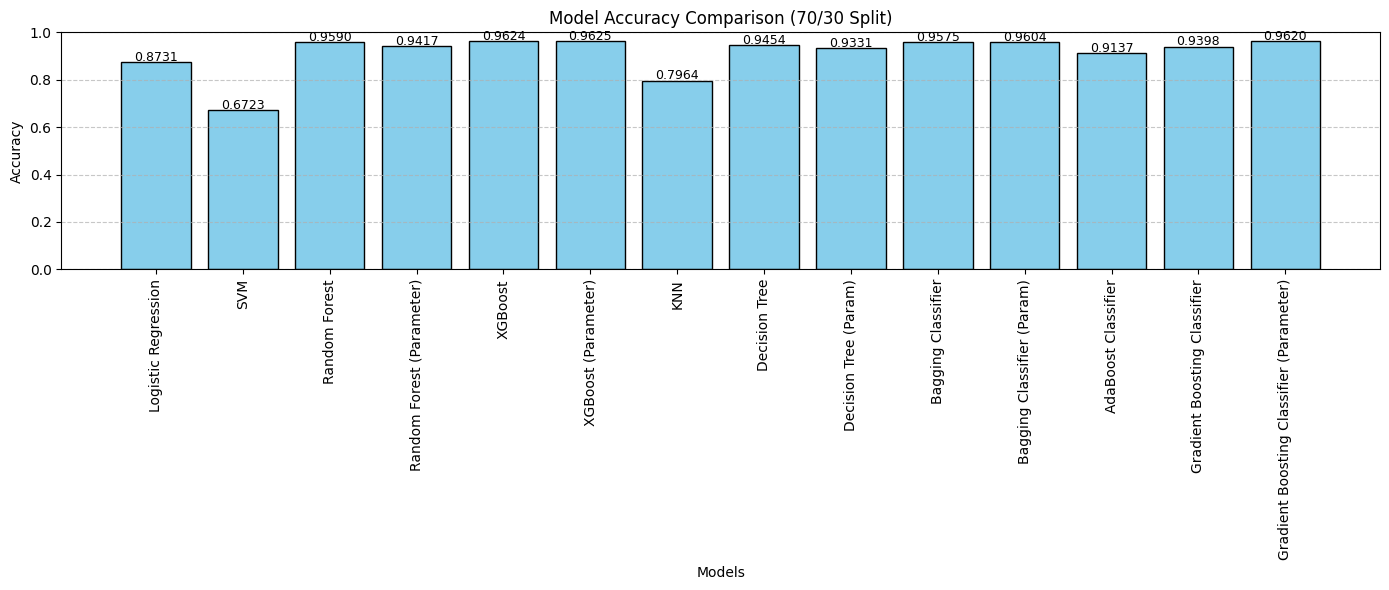

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf

# ===============================
# 0. Global Seed / Random State
# ===============================
RANDOM_STATE = 42
tf.random.set_seed(RANDOM_STATE)

# ===============================
# 1. Train-Test Split (70/30)
# ===============================
X = df.drop('satisfaction', axis=1)   # Replace with your target column
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)

# ===============================
# 2. Train Models & Store Accuracies
# ===============================
model_accuracies = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
logreg.fit(X_train, y_train)
model_accuracies["Logistic Regression"] = accuracy_score(y_test, logreg.predict(X_test))

# Support Vector Machine (SVM)
from sklearn.svm import SVC

# SVM (Default, which is RBF kernel with C=1.0, gamma='scale')
svm = SVC(kernel='rbf', random_state=RANDOM_STATE)
svm.fit(X_train, y_train)
model_accuracies["SVM"] = accuracy_score(y_test, svm.predict(X_test))

# Random Forest (Default)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
model_accuracies["Random Forest"] = accuracy_score(y_test, rf.predict(X_test))

# Random Forest (Tuned)
rf_parameter = RandomForestClassifier(
    n_estimators=200, max_depth=10, min_samples_split=5, random_state=RANDOM_STATE
)
rf_parameter.fit(X_train, y_train)
model_accuracies["Random Forest (Parameter)"] = accuracy_score(y_test, rf_parameter.predict(X_test))

# XGBoost (Default)
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=RANDOM_STATE)
xgb.fit(X_train, y_train)
model_accuracies["XGBoost"] = accuracy_score(y_test, xgb.predict(X_test))

# XGBoost (Tuned)
xgb_parameter = XGBClassifier(
    n_estimators=300, max_depth=6, learning_rate=0.1, eval_metric='logloss',
    use_label_encoder=False, random_state=RANDOM_STATE
)
xgb_parameter.fit(X_train, y_train)
model_accuracies["XGBoost (Parameter)"] = accuracy_score(y_test, xgb_parameter.predict(X_test))

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
model_accuracies["KNN"] = accuracy_score(y_test, knn.predict(X_test))

# Decision Tree (Default)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train, y_train)
model_accuracies["Decision Tree"] = accuracy_score(y_test, dt.predict(X_test))

# Decision Tree (Tuned)
dt_parameter = DecisionTreeClassifier(max_depth=8, min_samples_split=4, random_state=RANDOM_STATE)
dt_parameter.fit(X_train, y_train)
model_accuracies["Decision Tree (Param)"] = accuracy_score(y_test, dt_parameter.predict(X_test))

# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(random_state=RANDOM_STATE)
bag.fit(X_train, y_train)
model_accuracies["Bagging Classifier"] = accuracy_score(y_test, bag.predict(X_test))

# Bagging Classifier (Tuned)
bag_parameter = BaggingClassifier(n_estimators=150, random_state=RANDOM_STATE)
bag_parameter.fit(X_train, y_train)
model_accuracies["Bagging Classifier (Param)"] = accuracy_score(y_test, bag_parameter.predict(X_test))

# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=RANDOM_STATE)
ada.fit(X_train, y_train)
model_accuracies["AdaBoost Classifier"] = accuracy_score(y_test, ada.predict(X_test))

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb.fit(X_train, y_train)
model_accuracies["Gradient Boosting Classifier"] = accuracy_score(y_test, gb.predict(X_test))

# Gradient Boosting Classifier (Tuned)
gb_parameter = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=RANDOM_STATE)
gb_parameter.fit(X_train, y_train)
model_accuracies["Gradient Boosting Classifier (Parameter)"] = accuracy_score(y_test, gb_parameter.predict(X_test))



plt.figure(figsize=(14, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue', edgecolor='black')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Model Accuracy Comparison (70/30 Split)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

tf.random.set_seed(42)

model_accuracies = {}

# ===============================
# ANN Versions: Different Optimizers + Activations
# ===============================

# 1. ReLU + Adam
model_relu_adam = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_relu_adam.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                 tf.keras.metrics.Precision(name='precision'),
                                 tf.keras.metrics.Recall(name='recall')])

history_relu_adam = model_relu_adam.fit(X_train, y_train,
                                        epochs=125,
                                        validation_data=(X_test, y_test),
                                        verbose=0)

loss_relu_adam, acc_relu_adam, _, _ = model_relu_adam.evaluate(X_test, y_test, verbose=0)
model_accuracies["ANN (ReLU + Adam)"] = acc_relu_adam




==== ANN Results Summary ====

                       MODEL ARCHITECTURE OPTIMIZER  EPOCHS  ACCURACY  \
0          ANN (ReLU + Adam)    24-15-8-1      Adam     125  0.940973   
1  ANN (LeakyReLU + RMSprop)    24-15-7-1   RMSprop     130  0.922944   
2          ANN (ELU + Nadam)    25-12-8-1     Nadam     120  0.941775   
3           ANN (Tanh + SGD)    25-15-8-1       SGD     135  0.566662   

       LOSS  
0  0.140040  
1  0.194684  
2  0.137299  
3  0.684493  


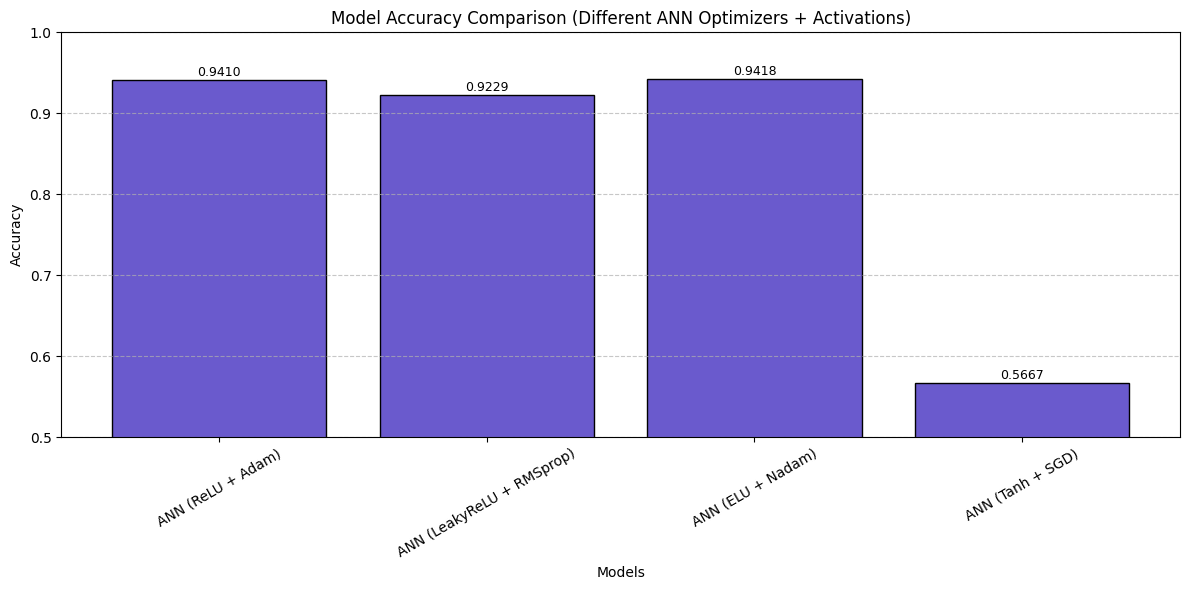

In [ ]:
# 2. LeakyReLU + RMSprop
model_lrelu_rms = tf.keras.Sequential([
    tf.keras.layers.Dense(24),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(15),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(7),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lrelu_rms.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                 tf.keras.metrics.Precision(name='precision'),
                                 tf.keras.metrics.Recall(name='recall')])

history_lrelu_rms = model_lrelu_rms.fit(X_train, y_train,
                                        epochs=130,
                                        validation_data=(X_test, y_test),
                                        verbose=0)

loss_lrelu_rms, acc_lrelu_rms, _, _ = model_lrelu_rms.evaluate(X_test, y_test, verbose=0)
model_accuracies["ANN (LeakyReLU + RMSprop)"] = acc_lrelu_rms


# 3. ELU + Nadam
model_elu_nadam = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='elu'),
    tf.keras.layers.Dense(12, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_elu_nadam.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002),
                        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                 tf.keras.metrics.Precision(name='precision'),
                                 tf.keras.metrics.Recall(name='recall')])

history_elu_nadam = model_elu_nadam.fit(X_train, y_train,
                                        epochs=120,
                                        validation_data=(X_test, y_test),
                                        verbose=0)

loss_elu_nadam, acc_elu_nadam, _, _ = model_elu_nadam.evaluate(X_test, y_test, verbose=0)
model_accuracies["ANN (ELU + Nadam)"] = acc_elu_nadam


# 4. Tanh + SGD
model_tanh_sgd = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='tanh'),
    tf.keras.layers.Dense(15, activation='tanh'),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_tanh_sgd.compile(loss=tf.keras.losses.binary_crossentropy,
                       optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                       metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                tf.keras.metrics.Precision(name='precision'),
                                tf.keras.metrics.Recall(name='recall')])

history_tanh_sgd = model_tanh_sgd.fit(X_train, y_train,
                                      epochs=135,
                                      validation_data=(X_test, y_test),
                                      verbose=0)

loss_tanh_sgd, acc_tanh_sgd, _, _ = model_tanh_sgd.evaluate(X_test, y_test, verbose=0)
model_accuracies["ANN (Tanh + SGD)"] = acc_tanh_sgd


# ===============================
# Create Summary Table
# ===============================
ann_results = pd.DataFrame([
    ["ANN (ReLU + Adam)",        "24-15-8-1",   "Adam",    125, acc_relu_adam,   loss_relu_adam],
    ["ANN (LeakyReLU + RMSprop)","24-15-7-1",   "RMSprop", 130,  acc_lrelu_rms,   loss_lrelu_rms],
    ["ANN (ELU + Nadam)",        "25-12-8-1",   "Nadam",   120,  acc_elu_nadam,   loss_elu_nadam],
    ["ANN (Tanh + SGD)",         "25-15-8-1",   "SGD",     135,  acc_tanh_sgd,    loss_tanh_sgd]
], columns=["MODEL", "ARCHITECTURE", "OPTIMIZER", "EPOCHS", "ACCURACY", "LOSS"])

print("\n==== ANN Results Summary ====\n")
print(ann_results)

# ===============================
# Plot Updated Results
# ===============================
plt.figure(figsize=(12, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='slateblue', edgecolor='black')
plt.ylim(0.5, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Model Accuracy Comparison (Different ANN Optimizers + Activations)')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## Train Test 75/25

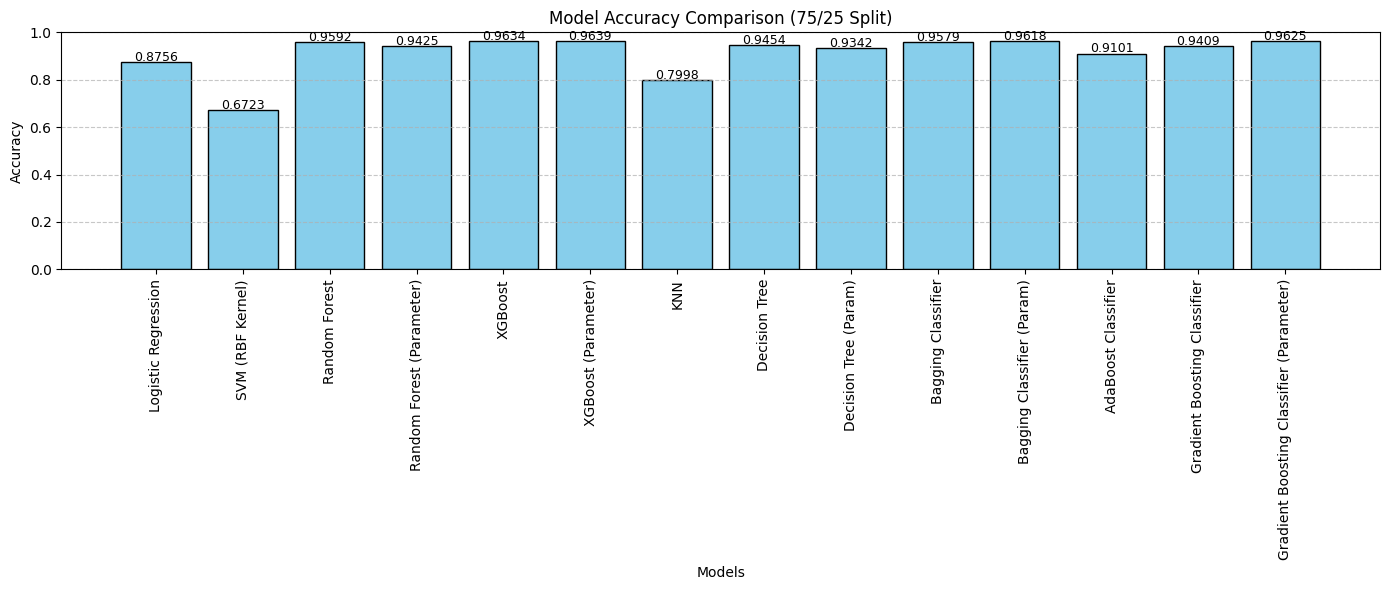

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf

# ===============================
# 0. Global Seed / Random State
# ===============================
RANDOM_STATE = 42
tf.random.set_seed(RANDOM_STATE)

# ===============================
# 1. Train-Test Split (75/25)
# ===============================
X = df.drop('satisfaction', axis=1)   # Replace with your target column
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)

# ===============================
# 2. Train Models & Store Accuracies
# ===============================
model_accuracies = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
logreg.fit(X_train, y_train)
model_accuracies["Logistic Regression"] = accuracy_score(y_test, logreg.predict(X_test))

# Support Vector Machine (SVM)
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=RANDOM_STATE)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
model_accuracies["SVM (RBF Kernel)"] = accuracy_score(y_test, y_pred_svm)

# Random Forest (Default)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
model_accuracies["Random Forest"] = accuracy_score(y_test, rf.predict(X_test))

# Random Forest (Tuned)
rf_parameter = RandomForestClassifier(
    n_estimators=200, max_depth=10, min_samples_split=5, random_state=RANDOM_STATE
)
rf_parameter.fit(X_train, y_train)
model_accuracies["Random Forest (Parameter)"] = accuracy_score(y_test, rf_parameter.predict(X_test))

# XGBoost (Default)
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=RANDOM_STATE)
xgb.fit(X_train, y_train)
model_accuracies["XGBoost"] = accuracy_score(y_test, xgb.predict(X_test))

# XGBoost (Tuned)
xgb_parameter = XGBClassifier(
    n_estimators=300, max_depth=6, learning_rate=0.1, eval_metric='logloss',
    use_label_encoder=False, random_state=RANDOM_STATE
)
xgb_parameter.fit(X_train, y_train)
model_accuracies["XGBoost (Parameter)"] = accuracy_score(y_test, xgb_parameter.predict(X_test))

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
model_accuracies["KNN"] = accuracy_score(y_test, knn.predict(X_test))

# Decision Tree (Default)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train, y_train)
model_accuracies["Decision Tree"] = accuracy_score(y_test, dt.predict(X_test))

# Decision Tree (Tuned)
dt_parameter = DecisionTreeClassifier(max_depth=8, min_samples_split=4, random_state=RANDOM_STATE)
dt_parameter.fit(X_train, y_train)
model_accuracies["Decision Tree (Param)"] = accuracy_score(y_test, dt_parameter.predict(X_test))

# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(random_state=RANDOM_STATE)
bag.fit(X_train, y_train)
model_accuracies["Bagging Classifier"] = accuracy_score(y_test, bag.predict(X_test))

# Bagging Classifier (Tuned)
bag_parameter = BaggingClassifier(n_estimators=150, random_state=RANDOM_STATE)
bag_parameter.fit(X_train, y_train)
model_accuracies["Bagging Classifier (Param)"] = accuracy_score(y_test, bag_parameter.predict(X_test))

# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=RANDOM_STATE)
ada.fit(X_train, y_train)
model_accuracies["AdaBoost Classifier"] = accuracy_score(y_test, ada.predict(X_test))

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb.fit(X_train, y_train)
model_accuracies["Gradient Boosting Classifier"] = accuracy_score(y_test, gb.predict(X_test))

# Gradient Boosting Classifier (Tuned)
gb_parameter = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=RANDOM_STATE)
gb_parameter.fit(X_train, y_train)
model_accuracies["Gradient Boosting Classifier (Parameter)"] = accuracy_score(y_test, gb_parameter.predict(X_test))


# ===============================
# 3. Plot Accuracies
# ===============================
plt.figure(figsize=(14, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue', edgecolor='black')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Model Accuracy Comparison (75/25 Split)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


## TRAIN TEST 60 40

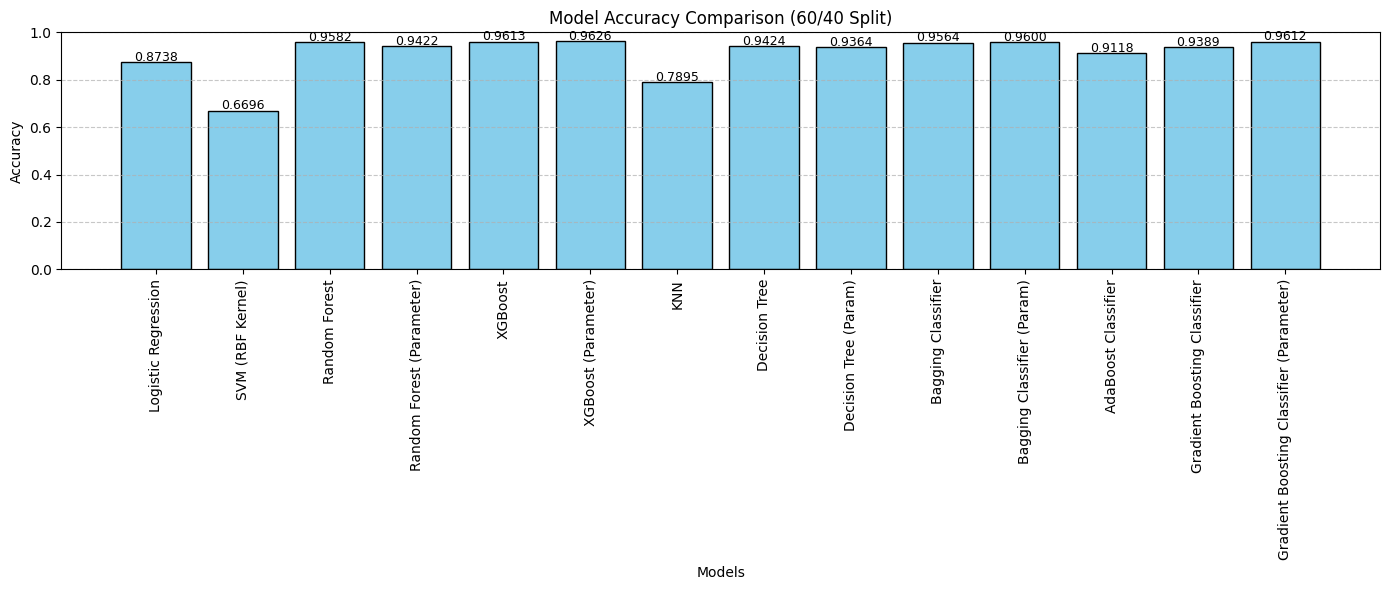

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf

# ===============================
# 0. Global Seed / Random State
# ===============================
RANDOM_STATE = 42
tf.random.set_seed(RANDOM_STATE)

# ===============================
# 1. Train-Test Split (60/40)
# ===============================
X = df.drop('satisfaction', axis=1)   # Replace with your target column
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=RANDOM_STATE, stratify=y
)

# ===============================
# 2. Train Models & Store Accuracies
# ===============================
model_accuracies = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
logreg.fit(X_train, y_train)
model_accuracies["Logistic Regression"] = accuracy_score(y_test, logreg.predict(X_test))

# Support Vector Machine (SVM)
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=RANDOM_STATE)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
model_accuracies["SVM (RBF Kernel)"] = accuracy_score(y_test, y_pred_svm)

# Random Forest (Default)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
model_accuracies["Random Forest"] = accuracy_score(y_test, rf.predict(X_test))

# Random Forest (Tuned)
rf_parameter = RandomForestClassifier(
    n_estimators=200, max_depth=10, min_samples_split=5, random_state=RANDOM_STATE
)
rf_parameter.fit(X_train, y_train)
model_accuracies["Random Forest (Parameter)"] = accuracy_score(y_test, rf_parameter.predict(X_test))

# XGBoost (Default)
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=RANDOM_STATE)
xgb.fit(X_train, y_train)
model_accuracies["XGBoost"] = accuracy_score(y_test, xgb.predict(X_test))

# XGBoost (Tuned)
xgb_parameter = XGBClassifier(
    n_estimators=300, max_depth=6, learning_rate=0.1, eval_metric='logloss',
    use_label_encoder=False, random_state=RANDOM_STATE
)
xgb_parameter.fit(X_train, y_train)
model_accuracies["XGBoost (Parameter)"] = accuracy_score(y_test, xgb_parameter.predict(X_test))

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
model_accuracies["KNN"] = accuracy_score(y_test, knn.predict(X_test))

# Decision Tree (Default)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train, y_train)
model_accuracies["Decision Tree"] = accuracy_score(y_test, dt.predict(X_test))

# Decision Tree (Tuned)
dt_parameter = DecisionTreeClassifier(max_depth=8, min_samples_split=4, random_state=RANDOM_STATE)
dt_parameter.fit(X_train, y_train)
model_accuracies["Decision Tree (Param)"] = accuracy_score(y_test, dt_parameter.predict(X_test))

# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(random_state=RANDOM_STATE)
bag.fit(X_train, y_train)
model_accuracies["Bagging Classifier"] = accuracy_score(y_test, bag.predict(X_test))

# Bagging Classifier (Tuned)
bag_parameter = BaggingClassifier(n_estimators=150, random_state=RANDOM_STATE)
bag_parameter.fit(X_train, y_train)
model_accuracies["Bagging Classifier (Param)"] = accuracy_score(y_test, bag_parameter.predict(X_test))

# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=RANDOM_STATE)
ada.fit(X_train, y_train)
model_accuracies["AdaBoost Classifier"] = accuracy_score(y_test, ada.predict(X_test))

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb.fit(X_train, y_train)
model_accuracies["Gradient Boosting Classifier"] = accuracy_score(y_test, gb.predict(X_test))

# Gradient Boosting Classifier (Tuned)
gb_parameter = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=RANDOM_STATE)
gb_parameter.fit(X_train, y_train)
model_accuracies["Gradient Boosting Classifier (Parameter)"] = accuracy_score(y_test, gb_parameter.predict(X_test))



plt.figure(figsize=(14, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue', edgecolor='black')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Model Accuracy Comparison (60/40 Split)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

tf.random.set_seed(42)

model_accuracies = {}

# ===============================
# ANN Versions: Different Optimizers + Activations
# ===============================

# 1. ReLU + Adam
model_relu_adam = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_relu_adam.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                 tf.keras.metrics.Precision(name='precision'),
                                 tf.keras.metrics.Recall(name='recall')])

history_relu_adam = model_relu_adam.fit(X_train, y_train,
                                        epochs=125,
                                        validation_data=(X_test, y_test),
                                        verbose=0)

loss_relu_adam, acc_relu_adam, _, _ = model_relu_adam.evaluate(X_test, y_test, verbose=0)
model_accuracies["ANN (ReLU + Adam)"] = acc_relu_adam


==== ANN Results Summary ====

                       MODEL ARCHITECTURE OPTIMIZER  EPOCHS  ACCURACY  \
0          ANN (ReLU + Adam)    24-15-8-1      Adam     125  0.939464   
1  ANN (LeakyReLU + RMSprop)    24-15-7-1   RMSprop     130  0.924137   
2          ANN (ELU + Nadam)    25-12-8-1     Nadam     120  0.936553   
3           ANN (Tanh + SGD)    25-15-8-1       SGD     135  0.566671   

       LOSS  
0  0.144058  
1  0.189035  
2  0.154105  
3  0.684331  


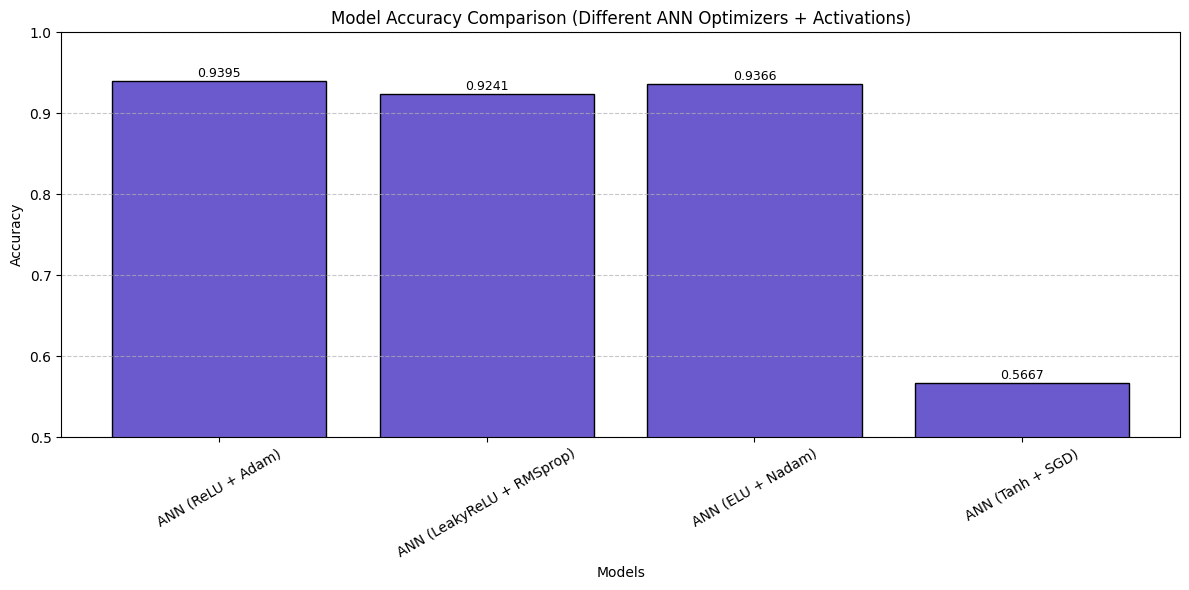

In [ ]:
# 2. LeakyReLU + RMSprop
model_lrelu_rms = tf.keras.Sequential([
    tf.keras.layers.Dense(24),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(15),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(7),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lrelu_rms.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                 tf.keras.metrics.Precision(name='precision'),
                                 tf.keras.metrics.Recall(name='recall')])

history_lrelu_rms = model_lrelu_rms.fit(X_train, y_train,
                                        epochs=130,
                                        validation_data=(X_test, y_test),
                                        verbose=0)

loss_lrelu_rms, acc_lrelu_rms, _, _ = model_lrelu_rms.evaluate(X_test, y_test, verbose=0)
model_accuracies["ANN (LeakyReLU + RMSprop)"] = acc_lrelu_rms


# 3. ELU + Nadam
model_elu_nadam = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='elu'),
    tf.keras.layers.Dense(12, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_elu_nadam.compile(loss=tf.keras.losses.binary_crossentropy,
                        optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002),
                        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                 tf.keras.metrics.Precision(name='precision'),
                                 tf.keras.metrics.Recall(name='recall')])

history_elu_nadam = model_elu_nadam.fit(X_train, y_train,
                                        epochs=120,
                                        validation_data=(X_test, y_test),
                                        verbose=0)

loss_elu_nadam, acc_elu_nadam, _, _ = model_elu_nadam.evaluate(X_test, y_test, verbose=0)
model_accuracies["ANN (ELU + Nadam)"] = acc_elu_nadam


# 4. Tanh + SGD
model_tanh_sgd = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='tanh'),
    tf.keras.layers.Dense(15, activation='tanh'),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_tanh_sgd.compile(loss=tf.keras.losses.binary_crossentropy,
                       optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                       metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                tf.keras.metrics.Precision(name='precision'),
                                tf.keras.metrics.Recall(name='recall')])

history_tanh_sgd = model_tanh_sgd.fit(X_train, y_train,
                                      epochs=135,
                                      validation_data=(X_test, y_test),
                                      verbose=0)

loss_tanh_sgd, acc_tanh_sgd, _, _ = model_tanh_sgd.evaluate(X_test, y_test, verbose=0)
model_accuracies["ANN (Tanh + SGD)"] = acc_tanh_sgd


# ===============================
# Create Summary Table
# ===============================
ann_results = pd.DataFrame([
    ["ANN (ReLU + Adam)",        "24-15-8-1",   "Adam",    125, acc_relu_adam,   loss_relu_adam],
    ["ANN (LeakyReLU + RMSprop)","24-15-7-1",   "RMSprop", 130,  acc_lrelu_rms,   loss_lrelu_rms],
    ["ANN (ELU + Nadam)",        "25-12-8-1",   "Nadam",   120,  acc_elu_nadam,   loss_elu_nadam],
    ["ANN (Tanh + SGD)",         "25-15-8-1",   "SGD",     135,  acc_tanh_sgd,    loss_tanh_sgd]
], columns=["MODEL", "ARCHITECTURE", "OPTIMIZER", "EPOCHS", "ACCURACY", "LOSS"])

print("\n==== ANN Results Summary ====\n")
print(ann_results)

# ===============================
# Plot Updated Results
# ===============================
plt.figure(figsize=(12, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='slateblue', edgecolor='black')
plt.ylim(0.5, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Model Accuracy Comparison (Different ANN Optimizers + Activations)')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# ANN RESULTS SUMMARY

In [ ]:
import pandas as pd
from tabulate import tabulate

# ==== 80/20 Results ====
results_80_20 = [
    ["80-20", "ANN (ReLU + Adam)", "24-15-8-1", "Adam", 125, 0.943987, 0.136149],
    ["80-20", "ANN (LeakyReLU + RMSprop)", "24-15-7-1", "RMSprop", 130, 0.943795, 0.137068],
    ["80-20", "ANN (ELU + Nadam)", "25-12-8-1", "Nadam", 120, 0.946345, 0.128698],
    ["80-20", "ANN (Tanh + SGD)", "25-15-8-1", "SGD", 135, 0.563640, 0.685053],
]

# ==== 70/30 Results ====
results_70_30 = [
    ["70-30", "ANN (ReLU + Adam)", "24-15-8-1", "Adam", 125, 0.940973, 0.140040],
    ["70-30", "ANN (LeakyReLU + RMSprop)", "24-15-7-1", "RMSprop", 130, 0.922944, 0.194684],
    ["70-30", "ANN (ELU + Nadam)", "25-12-8-1", "Nadam", 120, 0.941775, 0.137299],
    ["70-30", "ANN (Tanh + SGD)", "25-15-8-1", "SGD", 135, 0.566662, 0.684493],
]

# ==== 60/40 Results ====
results_60_40 = [
    ["60-40", "ANN (ReLU + Adam)", "24-15-8-1", "Adam", 125, 0.939464, 0.144058],
    ["60-40", "ANN (LeakyReLU + RMSprop)", "24-15-7-1", "RMSprop", 130, 0.924137, 0.189035],
    ["60-40", "ANN (ELU + Nadam)", "25-12-8-1", "Nadam", 120, 0.936553, 0.154105],
    ["60-40", "ANN (Tanh + SGD)", "25-15-8-1", "SGD", 135, 0.566671, 0.684331],
]

# Function to print each ratio separately with a border
def print_ratio_table(results, title):
    df = pd.DataFrame(results, columns=["TRAIN-TEST RATIO", "MODEL", "ARCHITECTURE", "OPTIMIZER", "EPOCHS", "ACCURACY", "LOSS"])
    print("\n" + "="*80)
    print(f" {title} Results ")
    print("="*80)
    print(tabulate(df, headers="keys", tablefmt="grid", showindex=False))

# Print all neatly separated
print("\n==== ANN Results Summary ====\n")
print_ratio_table(results_80_20, "80/20")
print_ratio_table(results_70_30, "70/30")
print_ratio_table(results_60_40, "60/40")



==== ANN Results Summary ====


 80/20 Results 
+--------------------+---------------------------+----------------+-------------+----------+------------+----------+
| TRAIN-TEST RATIO   | MODEL                     | ARCHITECTURE   | OPTIMIZER   |   EPOCHS |   ACCURACY |     LOSS |
+====================+===========================+================+=============+==========+============+==========+
| 80-20              | ANN (ReLU + Adam)         | 24-15-8-1      | Adam        |      125 |   0.943987 | 0.136149 |
+--------------------+---------------------------+----------------+-------------+----------+------------+----------+
| 80-20              | ANN (LeakyReLU + RMSprop) | 24-15-7-1      | RMSprop     |      130 |   0.943795 | 0.137068 |
+--------------------+---------------------------+----------------+-------------+----------+------------+----------+
| 80-20              | ANN (ELU + Nadam)         | 25-12-8-1      | Nadam       |      120 |   0.946345 | 0.128698 |
+--------------

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Create a DataFrame with model names, ratios, and accuracies
final_results_df = pd.DataFrame({
    "Model": [
        "Logistic Regression","SVM (RBF Kernel)", "Random Forest", "Random Forest (Parameter)",
        "XGBoost", "XGBoost (Parameter)", "KNN", "Decision Tree", "Decision Tree (Param)",
        "Bagging Classifier", "Bagging Classifier (Param)", "AdaBoost Classifier",
        "Gradient Boosting Classifier", "Gradient Boosting Classifier (Parameter)",
        "Logistic Regression", "SVM (RBF Kernel)", "Random Forest", "Random Forest (Parameter)",
        "XGBoost", "XGBoost (Parameter)", "KNN", "Decision Tree", "Decision Tree (Param)",
        "Bagging Classifier", "Bagging Classifier (Param)", "AdaBoost Classifier",
        "Gradient Boosting Classifier", "Gradient Boosting Classifier (Parameter)",
        "Logistic Regression", "SVM (RBF Kernel)", "Random Forest", "Random Forest (Parameter)",
        "XGBoost", "XGBoost (Parameter)", "KNN", "Decision Tree", "Decision Tree (Param)",
        "Bagging Classifier", "Bagging Classifier (Param)", "AdaBoost Classifier",
        "Gradient Boosting Classifier", "Gradient Boosting Classifier (Parameter)",
         "Logistic Regression", "SVM (RBF Kernel)", "Random Forest", "Random Forest (Parameter)",
        "XGBoost", "XGBoost (Parameter)", "KNN", "Decision Tree", "Decision Tree (Param)",
        "Bagging Classifier", "Bagging Classifier (Param)", "AdaBoost Classifier",
        "Gradient Boosting Classifier", "Gradient Boosting Classifier (Parameter)"
    ],
    "Ratio": [
        "80/20", "80/20", "80/20", "80/20", "80/20", "80/20", "80/20", "80/20", "80/20",
        "80/20", "80/20", "80/20", "80/20", "80/20",
        "70/30", "70/30", "70/30", "70/30", "70/30", "70/30", "70/30", "70/30", "70/30",
        "70/30", "70/30", "70/30", "70/30", "70/30",
        "60/40", "60/40", "60/40", "60/40", "60/40", "60/40", "60/40", "60/40", "60/40",
        "60/40", "60/40", "60/40", "60/40", "60/40",
        "75/25", "75/25", "75/25", "75/25", "75/25", "75/25", "75/25", "75/25", "75/25",
        "75/25", "75/25", "75/25", "75/25", "75/25"
    ],
    "Accuracy": [
        0.8346, 0.6680, 0.9624, 0.9480, 0.9633, 0.9633, 0.7759, 0.9480, 0.9500,
        0.9592, 0.9592, 0.9099, 0.9418, 0.9423,
        0.8731, 0.6723, 0.9590, 0.9417, 0.9624, 0.9625, 0.7964, 0.9454, 0.9331,
        0.9575, 0.9604, 0.9137, 0.9398, 0.9620,
        0.8738, 0.6696, 0.9582, 0.9422, 0.9613, 0.9626, 0.7895, 0.9424, 0.9364,
        0.9564, 0.9600, 0.9118, 0.9389, 0.9612,
        0.8756, 0.6723, 0.9592, 0.9425, 0.9634, 0.9639, 0.7998, 0.9454, 0.9342,
        0.9579, 0.9618, 0.9101, 0.9409, 0.9625
    ]
})

# Pivot the table: Models as rows, Ratios as columns
accuracy_table = final_results_df.pivot_table(
    index="Model",
    columns="Ratio",
    values="Accuracy"
).reset_index()

# Round values
accuracy_table = accuracy_table.round(3)

# Display the table
print("Comparison of Model Accuracies Across Train/Test Ratios")
print(tabulate(accuracy_table, headers="keys", tablefmt="grid"))

Comparison of Model Accuracies Across Train/Test Ratios
+----+------------------------------------------+---------+---------+---------+---------+
|    | Model                                    |   60/40 |   70/30 |   75/25 |   80/20 |
+====+==========================================+=========+=========+=========+=========+
|  0 | AdaBoost Classifier                      |   0.912 |   0.914 |   0.91  |   0.91  |
+----+------------------------------------------+---------+---------+---------+---------+
|  1 | Bagging Classifier                       |   0.956 |   0.958 |   0.958 |   0.959 |
+----+------------------------------------------+---------+---------+---------+---------+
|  2 | Bagging Classifier (Param)               |   0.96  |   0.96  |   0.962 |   0.959 |
+----+------------------------------------------+---------+---------+---------+---------+
|  3 | Decision Tree                            |   0.942 |   0.945 |   0.945 |   0.948 |
+----+--------------------------------------

# VIF

In [ ]:
def plot_vif_bar(vif_df, threshold=5):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Feature', y='VIF', data=vif_df, palette='coolwarm')
    plt.axhline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
    plt.title('Variance Inflation Factor (VIF) by Feature')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
X=df.drop(columns=['satisfaction'])


vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)

                              Feature        VIF
0                              Gender   1.011222
1                       Customer Type   1.577984
2                                 Age   1.160576
3                      Type of Travel   2.090390
4                     Flight Distance   1.366207
5               Inflight wifi service   2.462324
6   Departure/Arrival time convenient   1.668211
7              Ease of Online booking   2.707073
8                       Gate location   1.501705
9                      Food and drink   2.171963
10                    Online boarding   2.003760
11                       Seat comfort   2.386875
12             Inflight entertainment   3.887793
13                   On-board service   1.772534
14                   Leg room service   1.313735
15                   Baggage handling   1.905454
16                    Checkin service   1.227009
17                   Inflight service   2.071999
18                        Cleanliness   2.872707
19         Departure

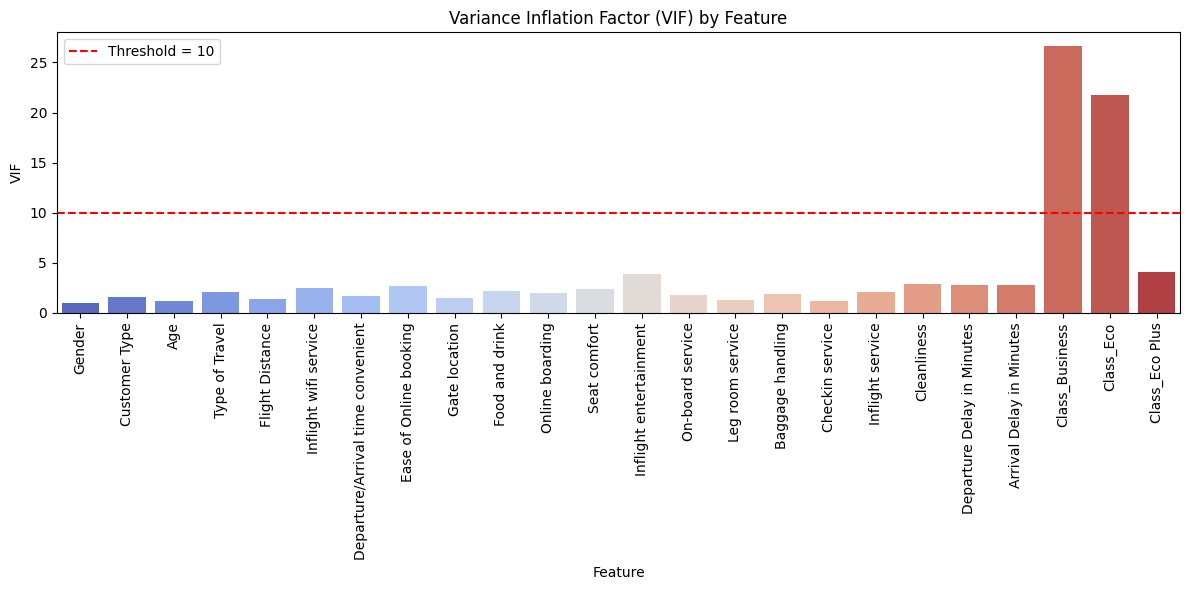

In [ ]:
plot_vif_bar(vif_data, threshold=10)

In [ ]:
# Recalculate VIF
def recal(X):


  vif_data = pd.DataFrame()
  vif_data["Feature"] = X.columns
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(X.shape[1])]

  print(vif_data)

In [ ]:
X = X.drop(columns=["Class_Business"])
recal(X)

                              Feature        VIF
0                              Gender   1.960614
1                       Customer Type   1.802352
2                                 Age   7.629131
3                      Type of Travel   3.016106
4                     Flight Distance   3.064926
5               Inflight wifi service  12.803056
6   Departure/Arrival time convenient   8.384081
7              Ease of Online booking  13.177293
8                       Gate location   9.033435
9                      Food and drink  14.128264
10                    Online boarding  13.224449
11                       Seat comfort  18.370921
12             Inflight entertainment  27.608871
13                   On-board service  13.853465
14                   Leg room service   9.493767
15                   Baggage handling  19.360551
16                    Checkin service   9.419460
17                   Inflight service  21.150990
18                        Cleanliness  20.728936
19         Departure

In [ ]:
X = X.drop(columns=["Inflight service"])

recal(X)

                              Feature        VIF
0                              Gender   1.954867
1                       Customer Type   1.770069
2                                 Age   7.627116
3                      Type of Travel   2.989885
4                     Flight Distance   3.059852
5               Inflight wifi service  12.795821
6   Departure/Arrival time convenient   8.364861
7              Ease of Online booking  13.177293
8                       Gate location   9.008374
9                      Food and drink  14.085752
10                    Online boarding  13.201300
11                       Seat comfort  18.320799
12             Inflight entertainment  26.105584
13                   On-board service  13.078574
14                   Leg room service   9.317225
15                   Baggage handling  16.118324
16                    Checkin service   9.237489
17                        Cleanliness  20.573603
18         Departure Delay in Minutes   4.332150
19           Arrival

In [ ]:
X = X.drop(columns=["Inflight entertainment"])
recal(X)

                              Feature        VIF
0                              Gender   1.952331
1                       Customer Type   1.721010
2                                 Age   7.618129
3                      Type of Travel   2.936241
4                     Flight Distance   3.056031
5               Inflight wifi service  12.543132
6   Departure/Arrival time convenient   8.307419
7              Ease of Online booking  13.144786
8                       Gate location   9.004243
9                      Food and drink  12.604710
10                    Online boarding  13.006415
11                       Seat comfort  17.487205
12                   On-board service  11.734372
13                   Leg room service   9.187165
14                   Baggage handling  14.947303
15                    Checkin service   8.896136
16                        Cleanliness  17.280644
17         Departure Delay in Minutes   4.331872
18           Arrival Delay in Minutes   4.360368
19                  

In [ ]:
X = X.drop(columns=["Seat comfort"])

recal(X)

                              Feature        VIF
0                              Gender   1.950991
1                       Customer Type   1.718419
2                                 Age   7.493920
3                      Type of Travel   2.935637
4                     Flight Distance   3.052229
5               Inflight wifi service  12.528879
6   Departure/Arrival time convenient   8.305504
7              Ease of Online booking  13.056791
8                       Gate location   8.933448
9                      Food and drink  11.714544
10                    Online boarding  12.220790
11                   On-board service  11.730039
12                   Leg room service   9.170872
13                   Baggage handling  14.947302
14                    Checkin service   8.855348
15                        Cleanliness  14.130684
16         Departure Delay in Minutes   4.331862
17           Arrival Delay in Minutes   4.360360
18                          Class_Eco   3.359980
19                  

In [ ]:
X = X.drop(columns=["Baggage handling"])

recal(X)

                              Feature        VIF
0                              Gender   1.942468
1                       Customer Type   1.677299
2                                 Age   7.491795
3                      Type of Travel   2.910769
4                     Flight Distance   3.041774
5               Inflight wifi service  12.501720
6   Departure/Arrival time convenient   8.285696
7              Ease of Online booking  13.037872
8                       Gate location   8.891434
9                      Food and drink  11.707615
10                    Online boarding  12.211221
11                   On-board service   9.363902
12                   Leg room service   8.468450
13                    Checkin service   8.660364
14                        Cleanliness  14.114336
15         Departure Delay in Minutes   4.331212
16           Arrival Delay in Minutes   4.359866
17                          Class_Eco   3.359944
18                     Class_Eco Plus   1.296794


In [ ]:
X = X.drop(columns=["Cleanliness"])

recal(X)

                              Feature        VIF
0                              Gender   1.941429
1                       Customer Type   1.676906
2                                 Age   7.491041
3                      Type of Travel   2.910763
4                     Flight Distance   3.039849
5               Inflight wifi service  12.499827
6   Departure/Arrival time convenient   8.278821
7              Ease of Online booking  12.851729
8                       Gate location   8.843519
9                      Food and drink   6.766759
10                    Online boarding  11.537926
11                   On-board service   9.344976
12                   Leg room service   8.428330
13                    Checkin service   8.559933
14         Departure Delay in Minutes   4.330904
15           Arrival Delay in Minutes   4.359865
16                          Class_Eco   3.358587
17                     Class_Eco Plus   1.296506


In [ ]:
X = X.drop(columns=["Ease of Online booking"])

recal(X)

                              Feature        VIF
0                              Gender   1.940528
1                       Customer Type   1.671361
2                                 Age   7.488130
3                      Type of Travel   2.901294
4                     Flight Distance   3.036621
5               Inflight wifi service   8.855657
6   Departure/Arrival time convenient   7.758077
7                       Gate location   8.165149
8                      Food and drink   6.679487
9                     Online boarding  10.976520
10                   On-board service   9.284335
11                   Leg room service   8.417729
12                    Checkin service   8.529979
13         Departure Delay in Minutes   4.330901
14           Arrival Delay in Minutes   4.359481
15                          Class_Eco   3.353472
16                     Class_Eco Plus   1.295577


In [ ]:
X = X.drop(columns=["Online boarding"])

recal(X)


                              Feature       VIF
0                              Gender  1.938064
1                       Customer Type  1.655848
2                                 Age  6.937447
3                      Type of Travel  2.888628
4                     Flight Distance  2.989230
5               Inflight wifi service  6.785432
6   Departure/Arrival time convenient  7.752676
7                       Gate location  8.098194
8                      Food and drink  6.291645
9                    On-board service  9.243197
10                   Leg room service  8.417460
11                    Checkin service  8.049938
12         Departure Delay in Minutes  4.330250
13           Arrival Delay in Minutes  4.359430
14                          Class_Eco  3.329819
15                     Class_Eco Plus  1.290347


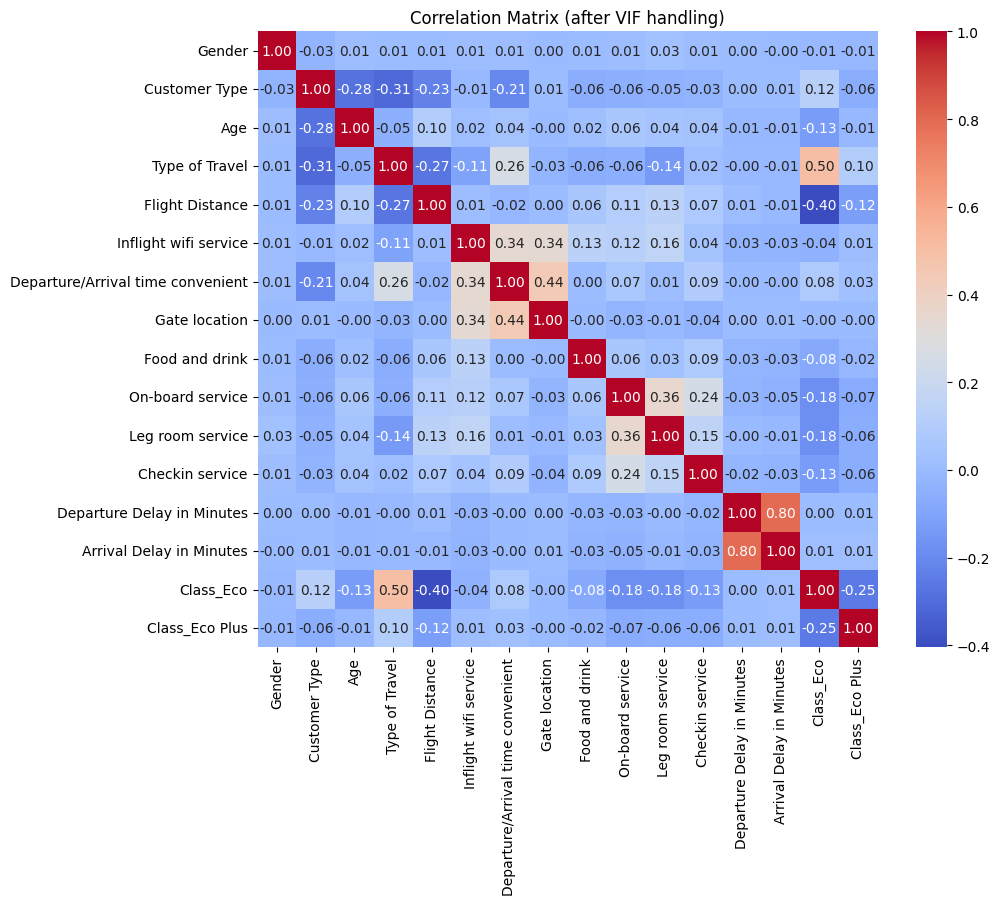

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (after VIF handling)')
plt.show()

## AFTER VIF MODEL TRAIN TEST 80/20

1.LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

y=df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)


In [ ]:
z=confusion_matrix(y_test, predictions)
z

array([[9688, 2025],
       [1542, 7526]])

In [ ]:

print("accuracy:",accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

accuracy: 0.8283528222895915
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     11713
           1       0.79      0.83      0.81      9068

    accuracy                           0.83     20781
   macro avg       0.83      0.83      0.83     20781
weighted avg       0.83      0.83      0.83     20781



2.SVM

In [ ]:

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test,y_pred)

0.6634906886097878

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm


array([[9808, 1905],
       [5088, 3980]])

In [ ]:
accuracy_score(y_test,y_pred)

0.6634906886097878

3.KNN

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7343246234541168

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[9647, 2066],
       [3455, 5613]])

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.74      0.82      0.78     11713
           1       0.73      0.62      0.67      9068

    accuracy                           0.73     20781
   macro avg       0.73      0.72      0.72     20781
weighted avg       0.73      0.73      0.73     20781



##Comparing Before and After Vif

Comparison of Model Accuracies (Before vs After VIF)
+----+---------------------+--------------+-------------+
|    | Model               |   Before VIF |   After VIF |
+====+=====================+==============+=============+
|  0 | Logistic Regression |        0.837 |       0.828 |
+----+---------------------+--------------+-------------+
|  1 | SVM                 |        0.668 |       0.667 |
+----+---------------------+--------------+-------------+
|  2 | KNN                 |        0.776 |       0.734 |
+----+---------------------+--------------+-------------+


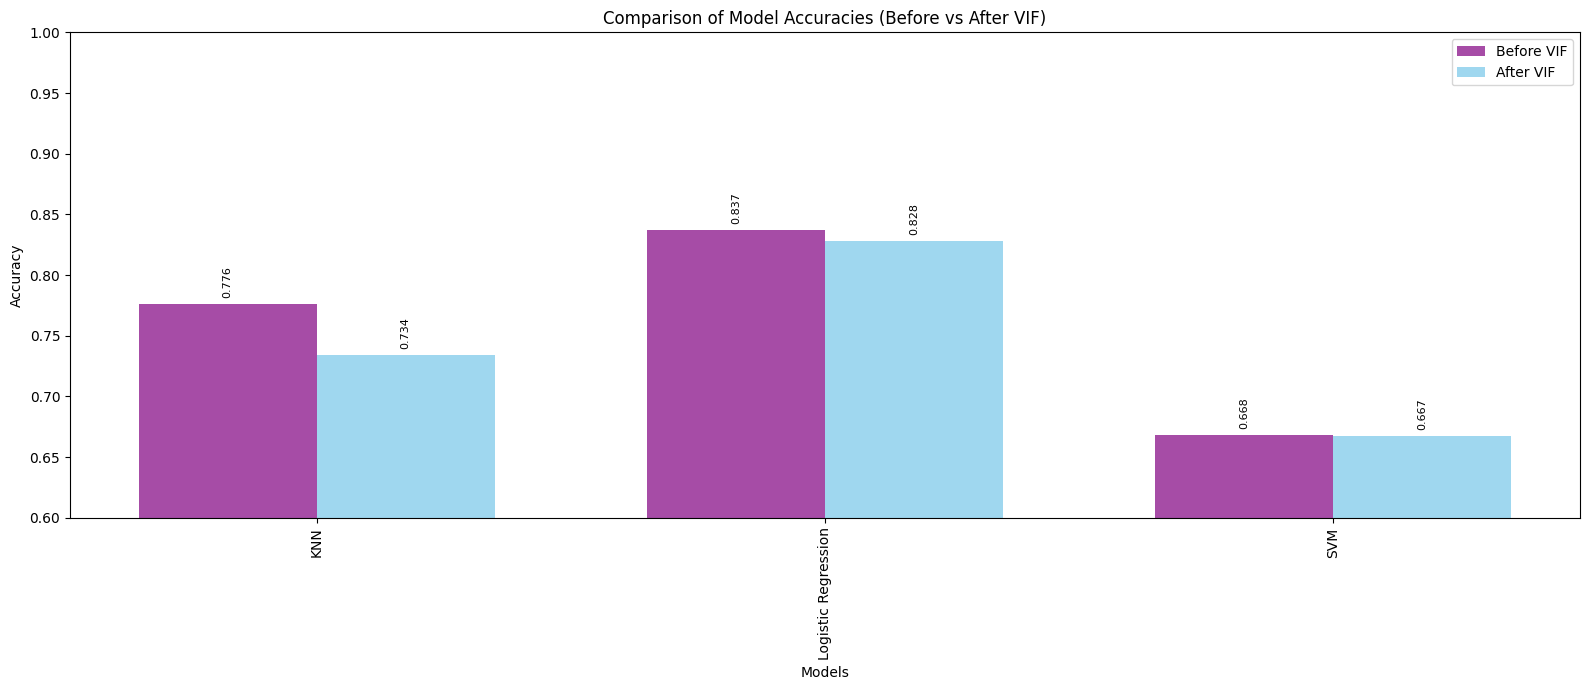

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate

# =======================
# 1. Accuracies Before VIF
# =======================
before_vif = {
    "Logistic Regression": 0.8371,
    "SVM": 0.6680,
    "KNN": 0.7764}

# =======================
# 2. Accuracies After VIF
# =======================
after_vif = {
    "Logistic Regression": 0.8283,
    "SVM":0.6671,
    "KNN": 0.7343
}

# =======================
# 3. Create DataFrame and Table
# =======================
comparison_data = {
    "Model": list(before_vif.keys()),
    "Before VIF": list(before_vif.values()),
    "After VIF": list(after_vif.values())
}
comparison_df = pd.DataFrame(comparison_data).round(3)

print("Comparison of Model Accuracies (Before vs After VIF)")
print(tabulate(comparison_df, headers="keys", tablefmt="grid"))

# =======================
# 4. Plot (existing plot code remains)
# =======================
models = sorted(set(before_vif.keys()).union(set(after_vif.keys())))

before_scores = [before_vif.get(m, np.nan) for m in models]
after_scores = [after_vif.get(m, np.nan) for m in models]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(16, 7))
bars1 = plt.bar(x - width/2, before_scores, width, label="Before VIF", color="purple", alpha=0.7)
bars2 = plt.bar(x + width/2, after_scores, width, label="After VIF", color="skyblue", alpha=0.8)

# Labels and title
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.title("Comparison of Model Accuracies (Before vs After VIF)")
plt.xticks(x, models, rotation=90)
plt.ylim(0.6, 1.0)
plt.legend()

# Annotate values on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    if not np.isnan(height):
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f"{height:.3f}",
                 ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()